# Proyek Analisis Data: Bike Sharing
- **Nama:** Ariella Asti Cahyani
- **Email:** ariellaasticahyani@gmail.com
- **ID Dicoding:** ariellastch

## Menentukan Pertanyaan Bisnis

### - Permintaan dan Pola penggunaan

1.   Bagaimana pola permintaan sepeda di berbagai musim?
*   Apakah musim panas memiliki lebih banyak permintaan dibandingkan musim dingin?
2.   Jam berapa yang memiliki permintaan tertingginuntuk penyewaan sepeda?
*   Apakah pada jam berangkat kerja (pagi) atau jam pulang kerja (sore)
3. Apakah ada perbedaan pola penggunaan sepeda pada hari kerja dibandingkan akhir pekan?






### - Segmentasi Pengguna

1.   Siapa pengguna utama sepeda? (casual / Registered)
*   Apakah pengguna registered lebih sering menggunakan sepeda dibandingkan pengguna casual?
2.   Kapan pengguna Casual lebih aktif dibandingkan pengguna Registered?
*   Apakah pengguna Casual lebih banyak diakhir pekan, atau di musim-musim tertentu?




### - Faktor Cuaca dan Lingkungan

1.   Bagaimana cuaca mempengaruhi permintaan sepeda?
*   Apakah penyewaan sepeda menurun pada hari-hari dengan cuaca buruk (Badai atau Salju lebat)?

2.   Berapa tingkat toleransi pengguna terhadap kondisi cuaca ekstrem?
*   Pada suhu tertentu atau kelembapan tertentu, apakh permintaan tetap stabil?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn




## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Machine Learning/Bike-sharing-dataset/day.csv'
day_df = pd.read_csv(file_path)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
file_path = '/content/drive/MyDrive/Machine Learning/Bike-sharing-dataset/hour.csv'
hour_df = pd.read_csv(file_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df.to_csv('day_updated.csv', index=False)



In [6]:
hour_df.to_csv('hour_updated.csv', index=False)


**Insight:**
- xxx
- xxx

### Assessing Data & Cleaning dataset day_df

In [7]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.duplicated().sum()
print('Jumlah Duplicate:', day_df.duplicated().sum())
day_df.isna().sum()

Jumlah Duplicate: 0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


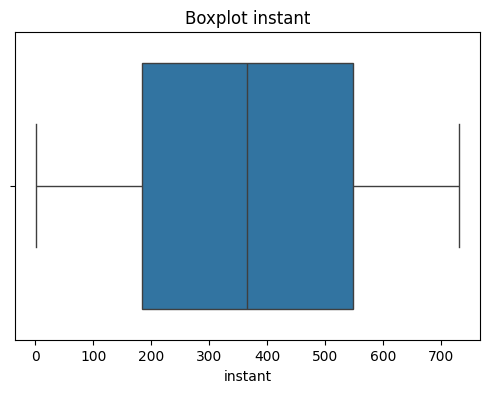

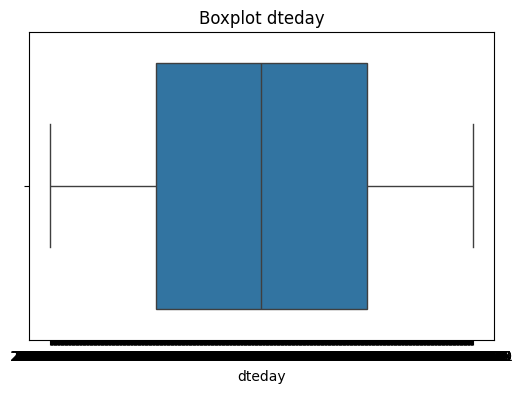

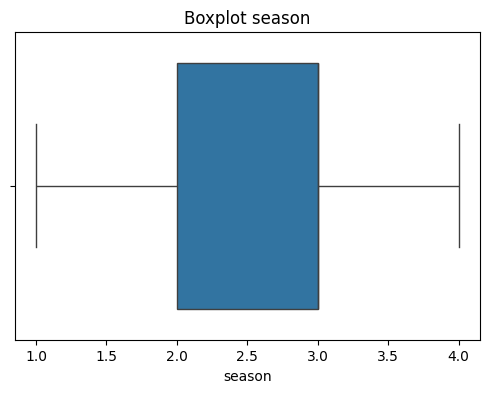

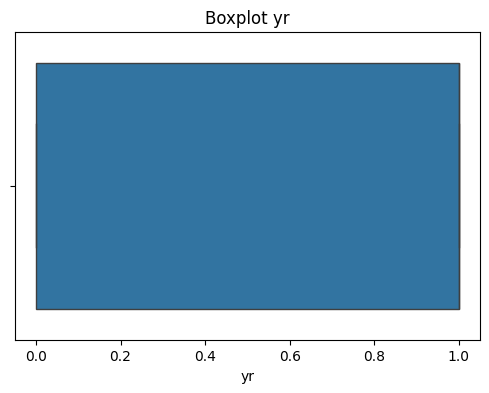

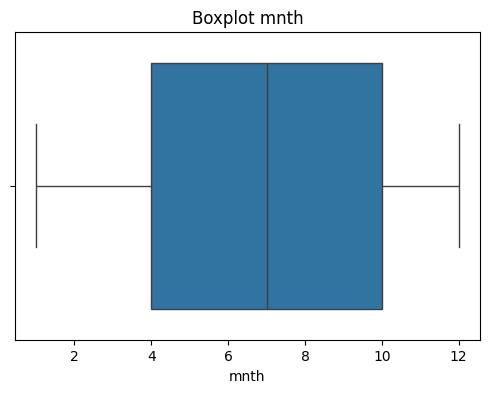

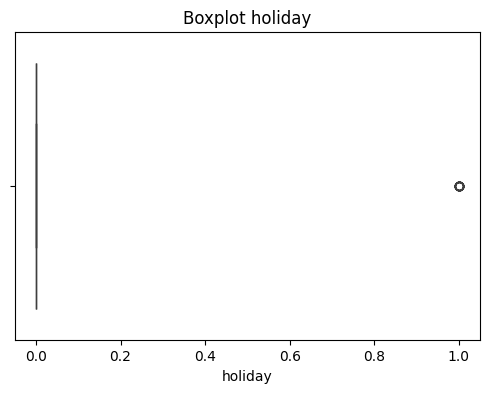

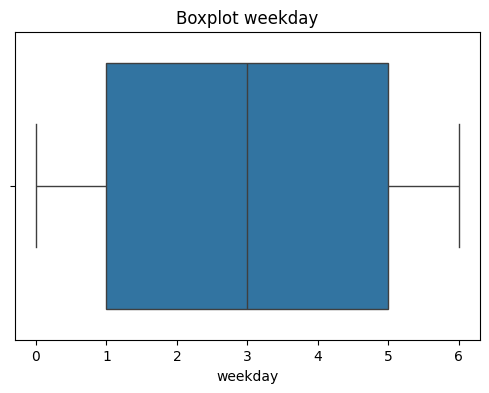

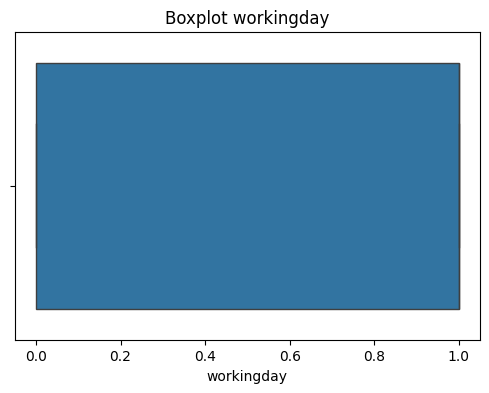

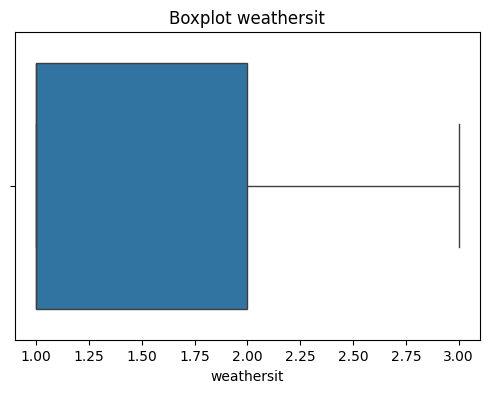

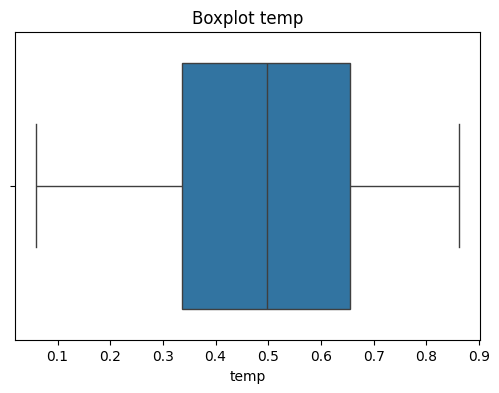

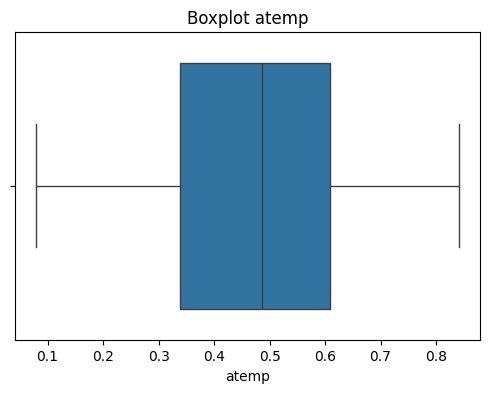

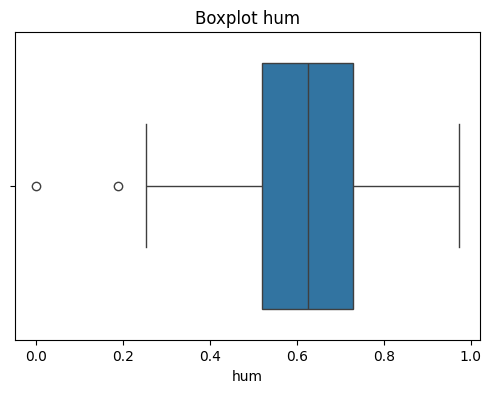

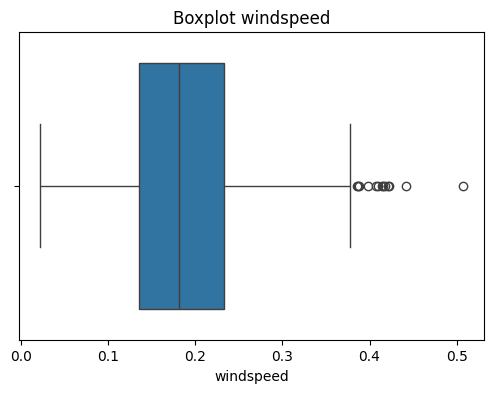

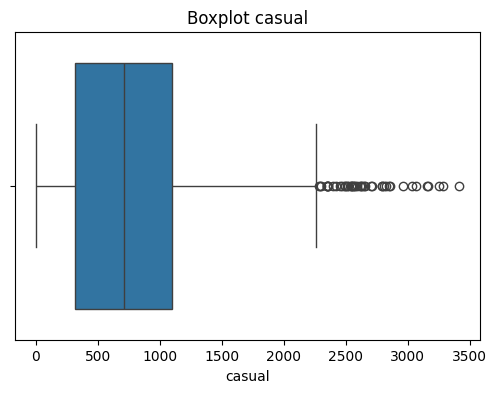

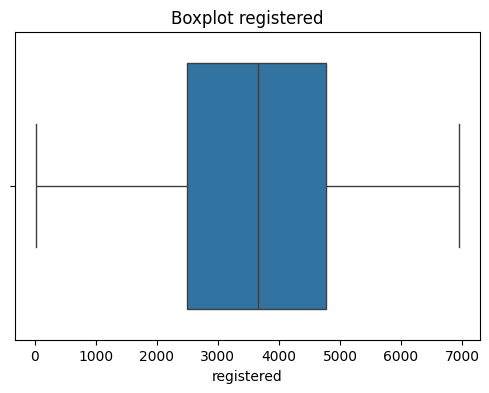

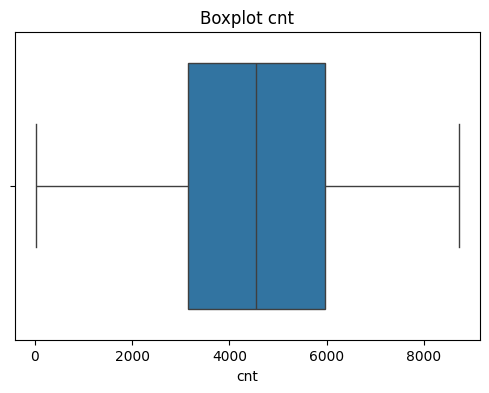

In [11]:
# Visualisasi boxplot outliers
for feature in day_df.columns:
    plt.figure(figsize=(6,4 ))
    sns.boxplot(x=day_df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()

In [12]:
# Cek distribusi kolom holiday
print(day_df['holiday'].value_counts())


holiday
0    710
1     21
Name: count, dtype: int64


In [13]:
# Cek distribusi kolom windspeed
print(day_df['windspeed'].value_counts())


windspeed
0.134954    3
0.228858    3
0.136817    3
0.110700    3
0.118792    3
           ..
0.206467    1
0.212696    1
0.343943    1
0.097021    1
0.154846    1
Name: count, Length: 650, dtype: int64


In [14]:
# Menghitung korelasi antara windspeed dan target (cnt)
print(day_df[['windspeed', 'cnt']].corr())

           windspeed       cnt
windspeed   1.000000 -0.234545
cnt        -0.234545  1.000000


In [15]:
# Memeriksa outliers di windspeed
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_windspeed = day_df[(day_df['windspeed'] < lower_bound) | (day_df['windspeed'] > upper_bound)]
print(f"Jumlah outliers windspeed: {len(outliers_windspeed)}")

Jumlah outliers windspeed: 13


In [16]:
# Use median imputation for windspeed
valid_windspeed = day_df[(day_df['windspeed'] >= lower_bound) & (day_df['windspeed'] <= upper_bound)]
median_windspeed = valid_windspeed['windspeed'].median()
day_df['windspeed'] = day_df['windspeed'].apply(lambda x: median_windspeed if (x < lower_bound or x > upper_bound) else x)
print(day_df['windspeed'].head())

0    0.160446
1    0.248539
2    0.248309
3    0.160296
4    0.186900
Name: windspeed, dtype: float64


In [17]:
# Menghitung kembali IQR
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengecek apakah masih ada outliers
outliers_windspeed_after = day_df[(day_df['windspeed'] < lower_bound) | (day_df['windspeed'] > upper_bound)]

# Menampilkan hasil
print(f"Jumlah outliers windspeed setelah imputasi: {len(outliers_windspeed_after)}")
print(outliers_windspeed_after)


Jumlah outliers windspeed setelah imputasi: 4
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
238      239  2011-08-27       3   0     8        0        6           0   
377      378  2012-01-13       1   1     1        0        5           1   
693      694  2012-11-24       4   1    11        0        6           0   
720      721  2012-12-21       1   1    12        0        5           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
238           2  0.680000  0.635556  0.850000   0.375617     226         889   
377           1  0.274167  0.249362  0.507500   0.378108     174        3040   
693           1  0.278333  0.248742  0.404583   0.376871     532        1745   
720           2  0.326667  0.301767  0.556667   0.374383     221        3402   

      cnt  
238  1115  
377  3214  
693  2277  
720  3623  


In [18]:
# Menampilkan nilai outliers
print(outliers_windspeed_after[['instant', 'dteday', 'windspeed']])

     instant      dteday  windspeed
238      239  2011-08-27   0.375617
377      378  2012-01-13   0.378108
693      694  2012-11-24   0.376871
720      721  2012-12-21   0.374383


In [19]:
# Imputasi ke 2 windspeed
median_windspeed = day_df['windspeed'].median()
day_df.loc[(day_df['windspeed'] < lower_bound) | (day_df['windspeed'] > upper_bound), 'windspeed'] = median_windspeed


In [20]:
# Mengecek ulang outliers setelah penanganan
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_windspeed_final = day_df[(day_df['windspeed'] < lower_bound) | (day_df['windspeed'] > upper_bound)]
print(f"Jumlah outliers windspeed setelah penanganan: {len(outliers_windspeed_final)}")


Jumlah outliers windspeed setelah penanganan: 0


In [21]:
# Mengecek outliers pada column casual
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_casual = day_df[(day_df['casual'] < lower_bound) | (day_df['casual'] > upper_bound)]
print(f"Jumlah outliers casual sebelum imputasi: {len(outliers_casual)}")



Jumlah outliers casual sebelum imputasi: 44


In [22]:
# Imputasi outliers dengan batas terdekat
day_df['casual'] = day_df['casual'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Mengecek kembali jumlah outliers setelah imputasi
outliers_casual_after_imputation = day_df[(day_df['casual'] < lower_bound) | (day_df['casual'] > upper_bound)]
print(f"Jumlah outliers casual setelah imputasi dengan Winsorizing: {len(outliers_casual_after_imputation)}")


Jumlah outliers casual setelah imputasi dengan Winsorizing: 0


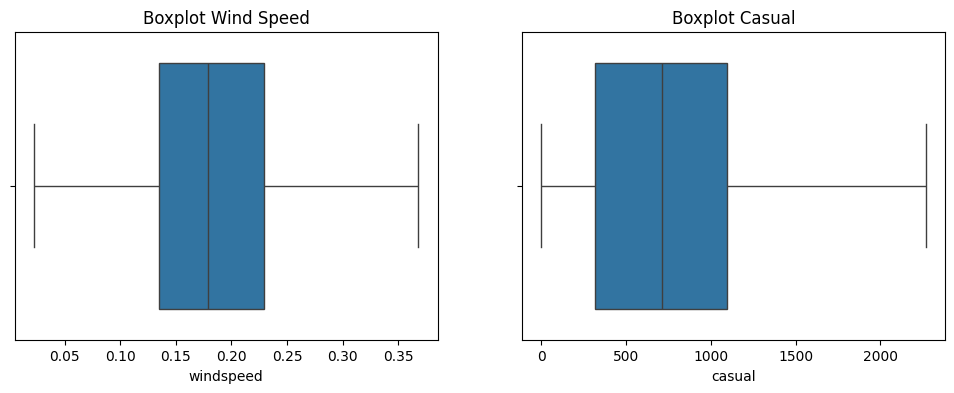

In [23]:
# boxplot untuk windspeed dan casual'
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot wind
sns.boxplot(x=day_df['windspeed'], ax=axs[0])
axs[0].set_title('Boxplot Wind Speed')

# Boxplot casual
sns.boxplot(x=day_df['casual'], ax=axs[1])
axs[1].set_title('Boxplot Casual')

plt.show()


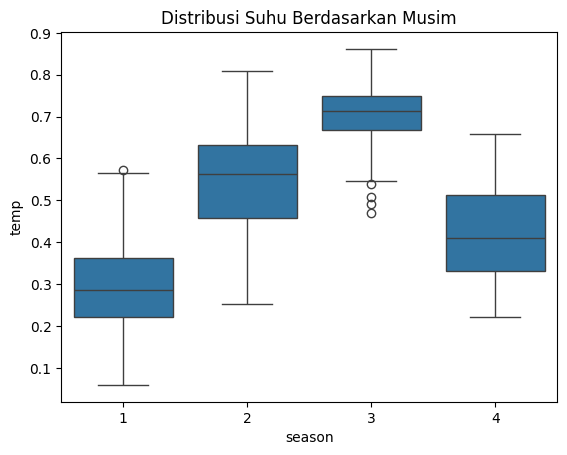

In [24]:
sns.boxplot(x='season', y='temp', data=day_df)
plt.title('Distribusi Suhu Berdasarkan Musim')
plt.show()


In [25]:
day_df['season'].value_counts()


,count
season,
3,188
2,184
1,181
4,178


In [26]:
# menghitung z-score untuk suhu (temp)
z_score = np.abs(stats.zscore(day_df['temp']))

# Menentukan treshold untuk outlier
treshold = 3
ouliers = day_df[z_score > treshold]
print(ouliers)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [27]:
Q1 = day_df['temp'].quantile(0.25)
Q3 = day_df['temp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = day_df[(day_df['temp'] < lower_bound) | (day_df['temp'] > upper_bound)]
print(outliers_iqr)



Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [28]:
# Tentukan batas atas dan bawah dengan faktor pengali yang lebih besar
factor = 2  # Faktor 2 atau lebih besar untuk membiarkan lebih banyak data
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Menghapus outlier dengan batas yang lebih longgar
day_df_cleaned = day_df[~((day_df['season'] == 3) & ((day_df['temp'] < lower_bound) | (day_df['temp'] > upper_bound)))]


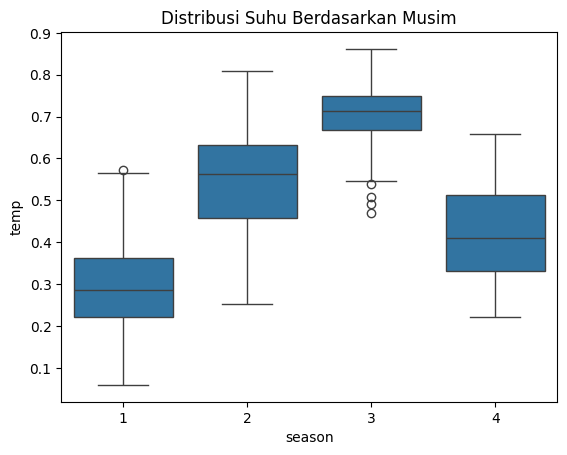

In [29]:
sns.boxplot(x='season', y='temp', data=day_df)
plt.title('Distribusi Suhu Berdasarkan Musim')
plt.show()


In [30]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
# convert object into timestamp
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [33]:
hour_df.duplicated().sum()
print('Jumlah Duplicate:', hour_df.duplicated().sum())
hour_df.isna().sum()

Jumlah Duplicate: 0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [34]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [35]:
print(hour_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [37]:
print(hour_df['hr'].head())

0    0
1    1
2    2
3    3
4    4
Name: hr, dtype: int64


In [38]:
"""# Visualisasi boxplot outliers pada hour dataset
for feature in hour_df.columns:
    plt.figure(figsize=(6,4 ))
    sns.boxplot(x=hour_df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()"""

"# Visualisasi boxplot outliers pada hour dataset\nfor feature in hour_df.columns:\n    plt.figure(figsize=(6,4 ))\n    sns.boxplot(x=hour_df[feature])\n    plt.title(f'Boxplot {feature}')\n    plt.show()"

In [39]:
"""# Cek distribusi data untuk casual, registered, dan cnt
for feature in ['casual', 'registered', 'cnt']:
    plt.figure(figsize=(6, 4))
    sns.histplot(hour_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()"""

"# Cek distribusi data untuk casual, registered, dan cnt\nfor feature in ['casual', 'registered', 'cnt']:\n    plt.figure(figsize=(6, 4))\n    sns.histplot(hour_df[feature], kde=True)\n    plt.title(f'Distribution of {feature}')\n    plt.show()"

## Cleaning dataset hour_df

### Cleaning column casual

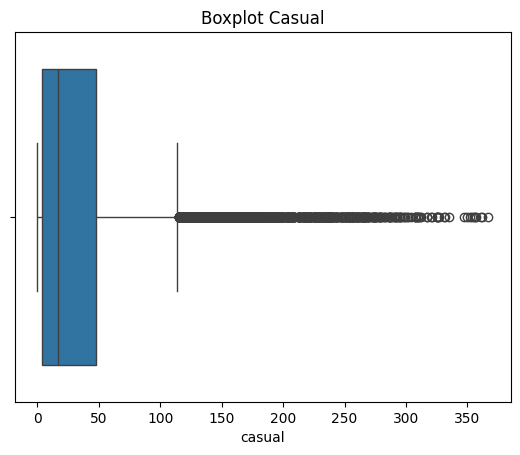

In [40]:
# Visualisasi casual
sns.boxplot(x=hour_df['casual'])
plt.title('Boxplot Casual')
plt.show()

In [41]:
# IQR for casual
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Q1: 4.0
Q3: 48.0
IQR: 44.0
Lower Bound: -62.0
Upper Bound: 114.0


In [42]:
# Find the outliers of casual
hour_df.loc[(hour_df['casual'] > upper_bound) | (hour_df['casual'] < lower_bound)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1633,1634,2011-03-13,1,0,3,14,0,0,0,1,0.46,0.4545,0.41,0.2985,144,106,250
1634,1635,2011-03-13,1,0,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,149,155,304
1635,1636,2011-03-13,1,0,3,16,0,0,0,1,0.46,0.4545,0.41,0.3881,124,132,256
1771,1772,2011-03-19,1,0,3,12,0,6,0,1,0.46,0.4545,0.33,0.4179,126,141,267
1772,1773,2011-03-19,1,0,3,13,0,6,0,1,0.50,0.4848,0.34,0.4627,174,127,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,16818,2012-12-08,4,1,12,12,0,6,0,2,0.40,0.4091,0.87,0.2239,122,364,486
16818,16819,2012-12-08,4,1,12,13,0,6,0,2,0.40,0.4091,0.87,0.1642,148,399,547
16819,16820,2012-12-08,4,1,12,14,0,6,0,2,0.40,0.4091,0.87,0.2836,164,378,542
16820,16821,2012-12-08,4,1,12,15,0,6,0,1,0.42,0.4242,0.82,0.1642,167,374,541


In [43]:
# trimming outliers
new_casual_df = hour_df.loc[(hour_df['casual'] <= upper_bound) & (hour_df['casual'] >= lower_bound)]
print('before removing outliers:', len(hour_df))
print('after removing outliers:', len(new_casual_df))
print('outliers:', len(hour_df)-len(new_casual_df))

before removing outliers: 17379
after removing outliers: 16187
outliers: 1192


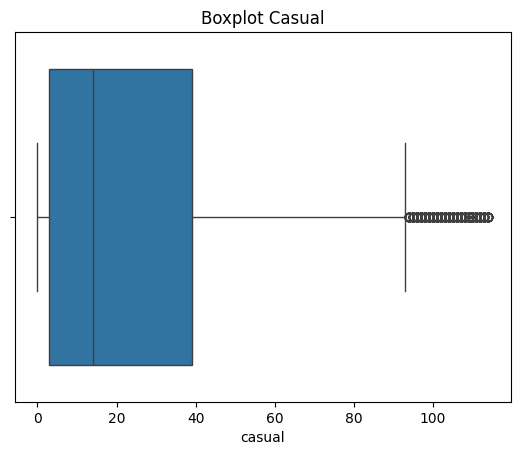

In [44]:
# Visualisasi casual
sns.boxplot(x=new_casual_df['casual'])
plt.title('Boxplot Casual')
plt.show()

In [45]:
# capping outliers of casual
new_casual_df = hour_df.copy()
new_casual_df.loc[(new_casual_df['casual'] > upper_bound), 'casual'] = upper_bound
new_casual_df.loc[(new_casual_df['casual'] < lower_bound), 'casual'] = lower_bound

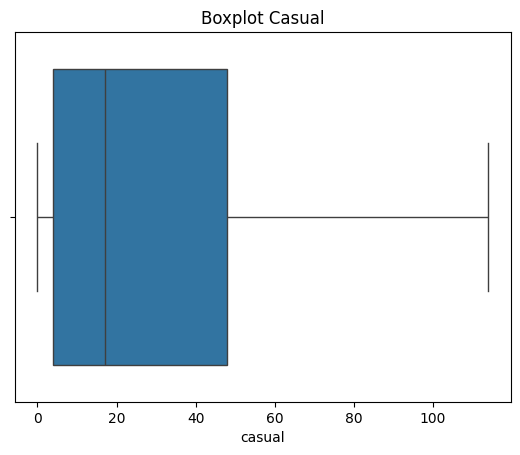

In [46]:
# Visualisasi casual
sns.boxplot(x=new_casual_df['casual'])
plt.title('Boxplot Casual')
plt.show()

### Cleaning column registered

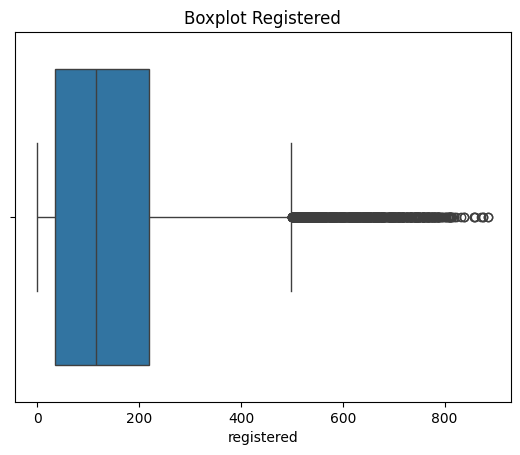

In [47]:
sns.boxplot(x=hour_df['registered'])
plt.title('Boxplot Registered')
plt.show()

In [48]:
#IQR Method
Q1 = hour_df['registered'].quantile(0.25)
Q3 = hour_df['registered'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Q1: 34.0
Q3: 220.0
IQR: 186.0
Lower Bound: -245.0
Upper Bound: 499.0


In [49]:
# find outliers
hour_df.loc[(hour_df['registered'] > upper_bound) | (hour_df['registered'] < lower_bound)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2995,2996,2011-05-09,2,0,5,17,0,1,1,1,0.62,0.6212,0.38,0.2537,59,539,598
3019,3020,2011-05-10,2,0,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
3067,3068,2011-05-12,2,0,5,17,0,4,1,2,0.64,0.6212,0.57,0.1940,54,540,594
3187,3188,2011-05-17,2,0,5,17,0,2,1,1,0.62,0.6061,0.65,0.4179,83,521,604
3379,3380,2011-05-25,2,0,5,17,0,3,1,1,0.74,0.6667,0.51,0.2239,77,524,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,17064,2012-12-18,4,1,12,18,0,2,1,1,0.38,0.3939,0.46,0.3284,13,512,525
17077,17078,2012-12-19,4,1,12,8,0,3,1,1,0.24,0.2576,0.87,0.1045,13,665,678
17086,17087,2012-12-19,4,1,12,17,0,3,1,1,0.40,0.4091,0.50,0.3881,26,536,562
17087,17088,2012-12-19,4,1,12,18,0,3,1,1,0.38,0.3939,0.50,0.3582,23,546,569


In [50]:
# trimming
new_registered_df = hour_df.loc[(hour_df['registered'] <= upper_bound) & (hour_df['registered'] >= lower_bound)]
print('before removing outliers:', len(hour_df))
print('after removing outliers:', len(new_registered_df))
print('outliers:', len(hour_df)-len(new_registered_df))

before removing outliers: 17379
after removing outliers: 16699
outliers: 680


In [51]:
# capping
new_registered_df = hour_df.copy()
new_registered_df.loc[(new_registered_df['registered'] > upper_bound), 'registered'] = upper_bound
new_registered_df.loc[(new_registered_df['registered'] < lower_bound), 'registered'] = lower_bound

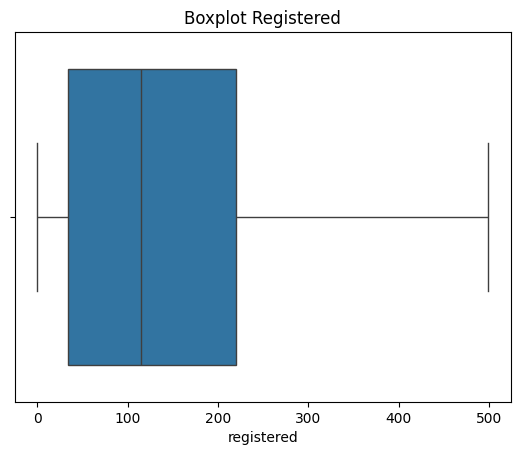

In [52]:
sns.boxplot(x=new_registered_df['registered'])
plt.title('Boxplot Registered')
plt.show()

### Cleaning cnt

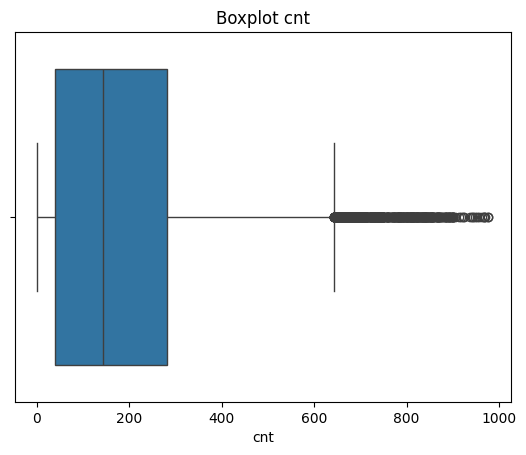

In [53]:
sns.boxplot(x=hour_df['cnt'])
plt.title('Boxplot cnt')
plt.show()

In [54]:
# IQR Method
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Q1: 40.0
Q3: 281.0
IQR: 241.0
Lower Bound: -321.5
Upper Bound: 642.5


In [55]:
# find the outliers
hour_df.loc[(hour_df['cnt'] > upper_bound) | (hour_df['cnt'] < lower_bound)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


In [56]:
# trimming
new_cnt_df = hour_df.loc[(hour_df['cnt'] <= upper_bound) & (hour_df['cnt'] >= lower_bound)]
print('before removing outliers:', len(hour_df))
print('after removing outliers:', len(new_cnt_df))
print('outliers:', len(hour_df)-len(new_cnt_df))

before removing outliers: 17379
after removing outliers: 16874
outliers: 505


In [57]:
# capping
new_cnt_df = hour_df.copy()
new_cnt_df.loc[(new_registered_df['cnt'] > upper_bound), 'cnt'] = upper_bound
new_cnt_df.loc[(new_registered_df['cnt'] < lower_bound), 'cnt'] = lower_bound

<ipython-input-57-d07fc4cf4d18>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '642.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_cnt_df.loc[(new_registered_df['cnt'] > upper_bound), 'cnt'] = upper_bound


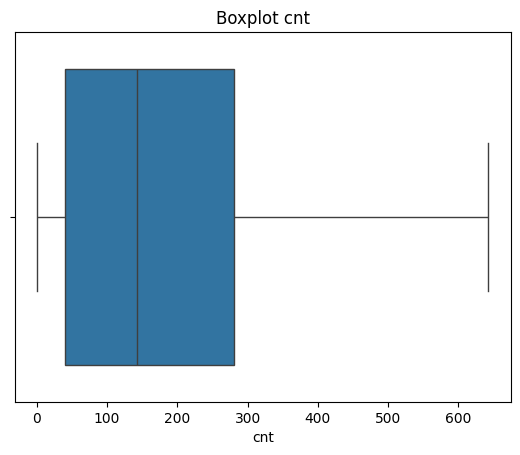

In [58]:
sns.boxplot(x=new_cnt_df['cnt'])
plt.title('Boxplot cnt')
plt.show()

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

In [59]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    float64
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(5), int64(10), object(1)
memory usage: 91.5+ KB


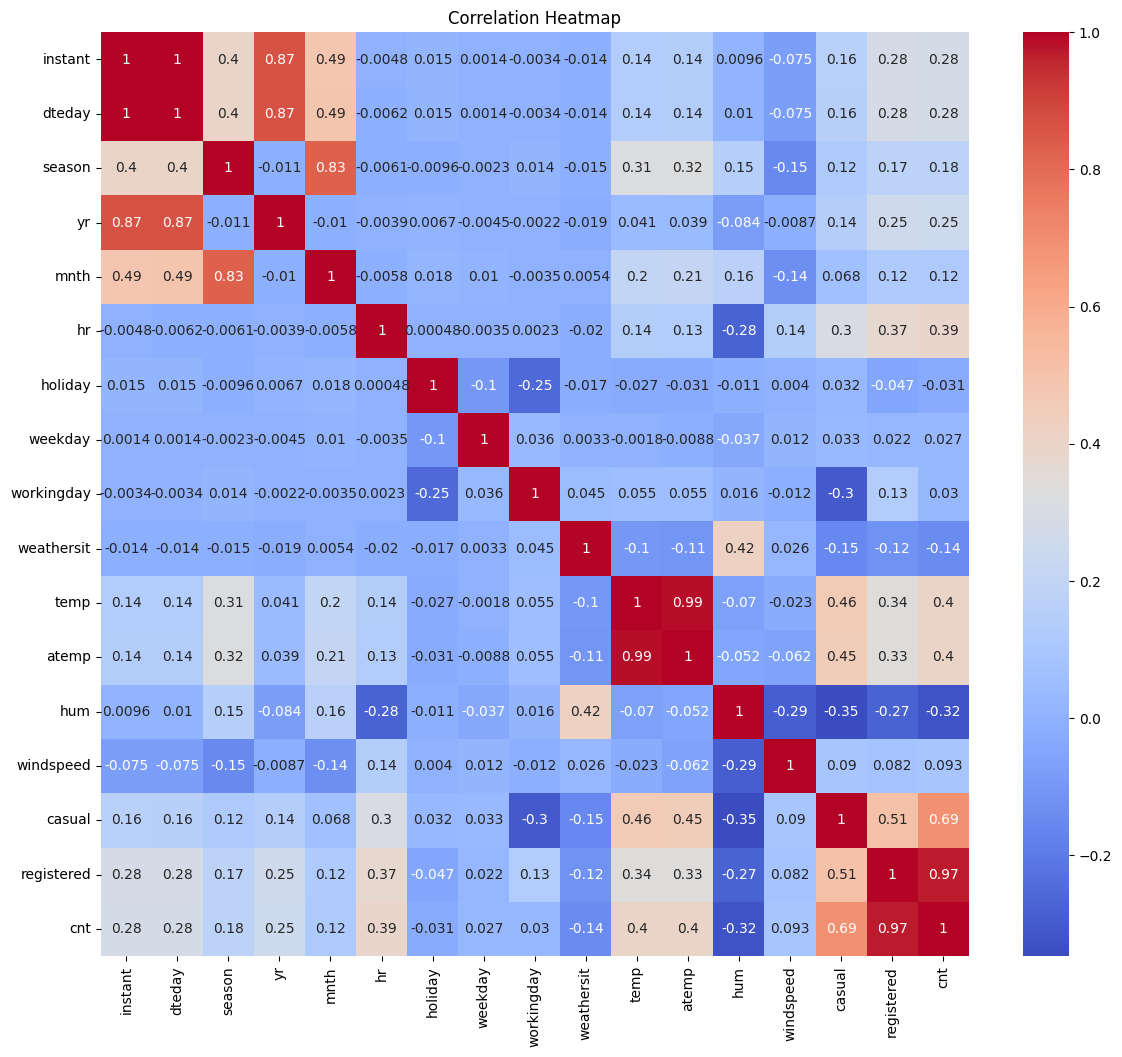

In [60]:
# Menghitung korelasi antar kolom numerik
correlation = hour_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

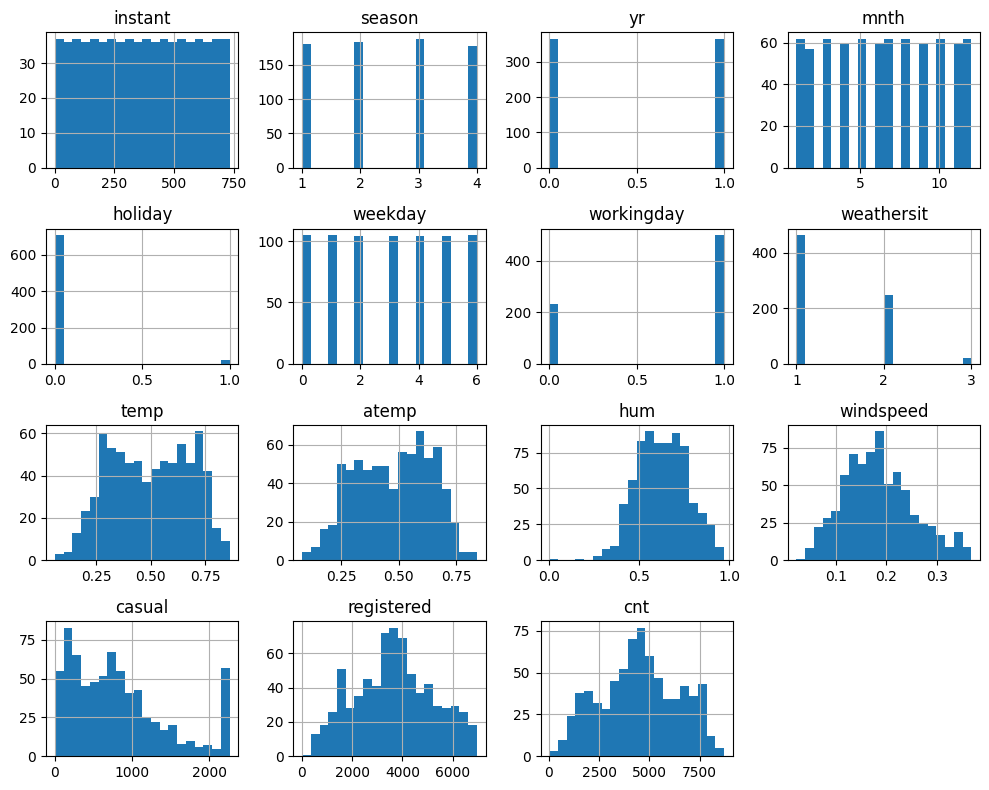

In [61]:
# Menghitung day_df menggunakan barplot
day_df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

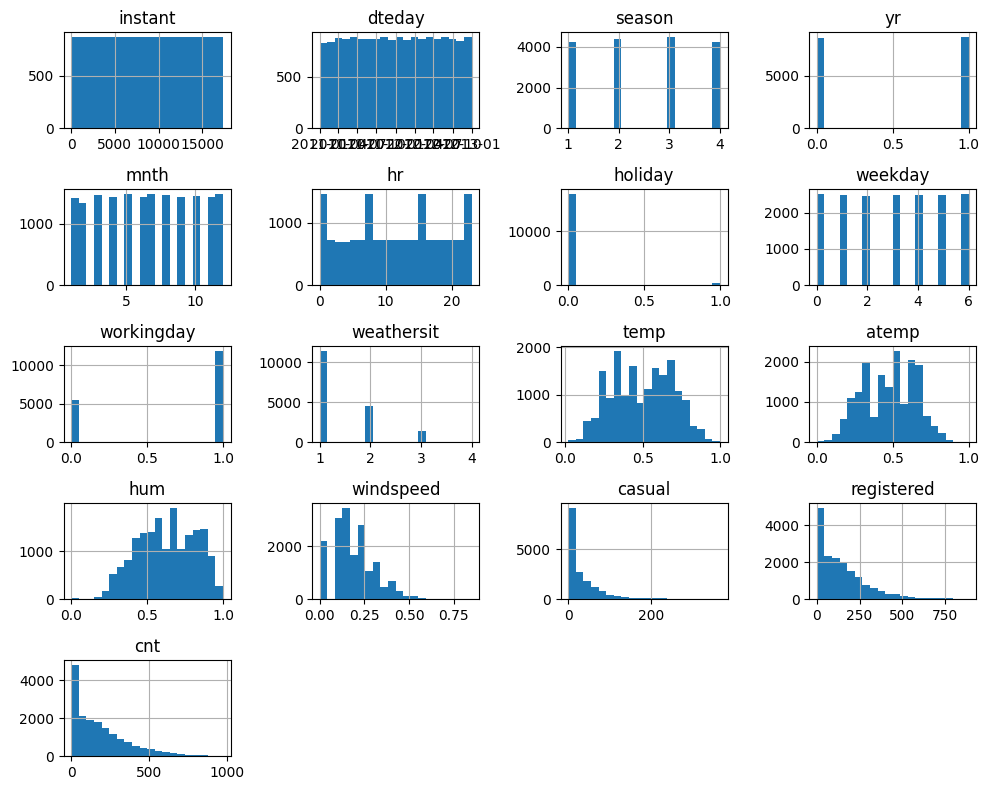

In [62]:
# Menghitung day_df menggunakan barplot
hour_df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

### Explore pola dan permintaan penggunaan


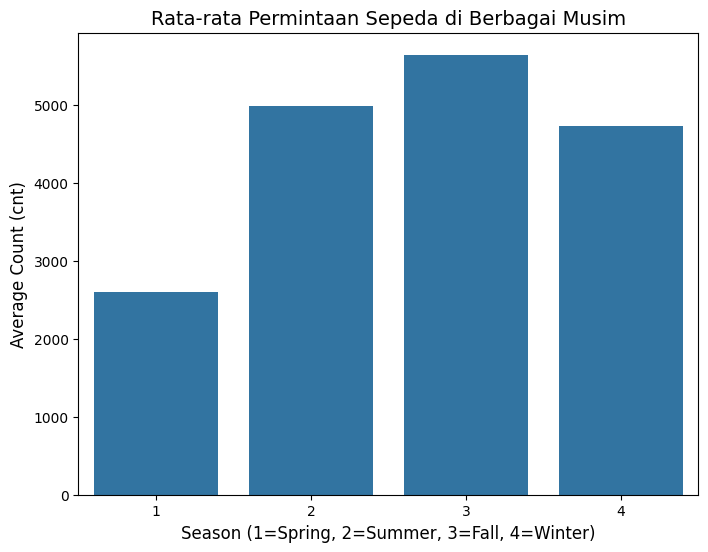

In [63]:
# Menghitung rata-rata jumlah sepeda yang disewa permusim
season_avg_rent = day_df.groupby('season')['cnt'].mean().reset_index()
season_avg_rent

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_avg_rent)
plt.title('Rata-rata Permintaan Sepeda di Berbagai Musim', fontsize=14)
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.show()

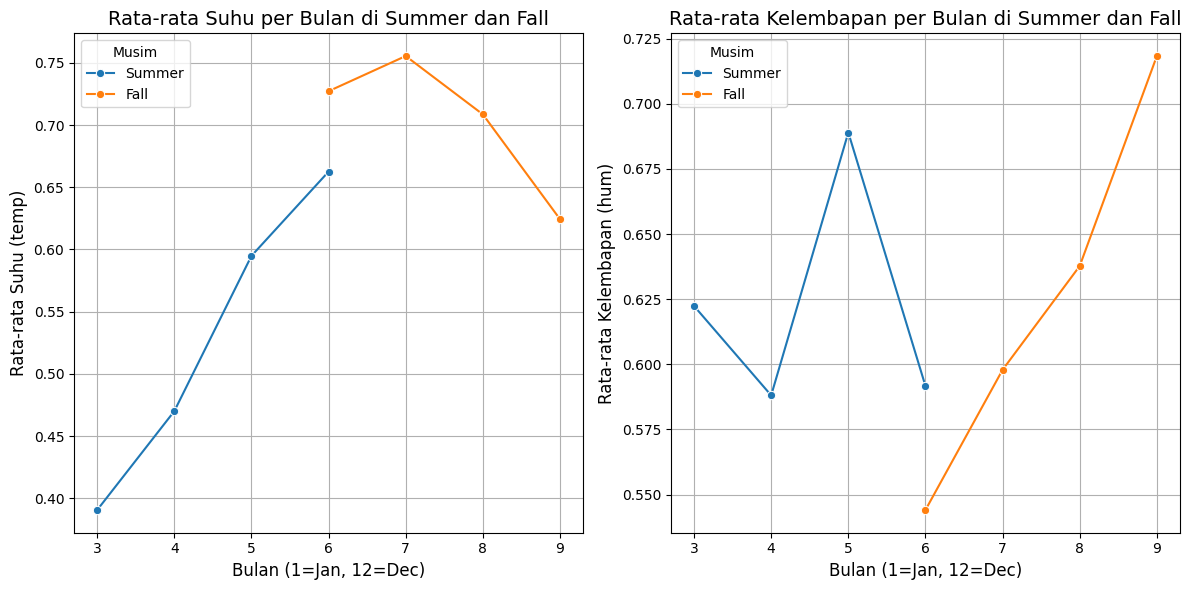

In [64]:
# Filter data hanya untuk Fall dan Summer
fall_summer_data = day_df[day_df['season'].isin([2, 3])]

# Hitung rata-rata suhu dan kelembapan per bulan di Fall dan Summer
fall_summer_summary = fall_summer_data.groupby(['season', 'mnth'])[['temp', 'hum']].mean().reset_index()

# Map nama musim untuk interpretasi
season_mapping = {2: 'Summer', 3: 'Fall'}
fall_summer_summary['season'] = fall_summer_summary['season'].map(season_mapping)

# Plot rata-rata suhu per bulan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(
    data=fall_summer_summary,
    x='mnth', y='temp', hue='season', marker='o'
)
plt.title('Rata-rata Suhu per Bulan di Summer dan Fall', fontsize=14)
plt.xlabel('Bulan (1=Jan, 12=Dec)', fontsize=12)
plt.ylabel('Rata-rata Suhu (temp)', fontsize=12)
plt.legend(title='Musim')
plt.grid()

# Plot rata-rata kelembapan per bulan
plt.subplot(1, 2, 2)
sns.lineplot(
    data=fall_summer_summary,
    x='mnth', y='hum', hue='season', marker='o'
)
plt.title('Rata-rata Kelembapan per Bulan di Summer dan Fall', fontsize=14)
plt.xlabel('Bulan (1=Jan, 12=Dec)', fontsize=12)
plt.ylabel('Rata-rata Kelembapan (hum)', fontsize=12)
plt.legend(title='Musim')
plt.grid()

plt.tight_layout()
plt.show()


In [65]:
temp_by_season = day_df.groupby('season')['temp'].mean()
print(temp_by_season)


season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64


In [66]:
avg_temp_per_season = day_df.groupby('season')['temp'].mean()
print(avg_temp_per_season)


season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64


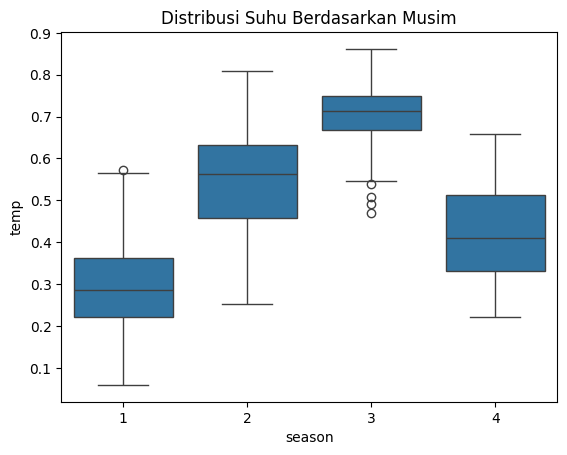

In [67]:
sns.boxplot(x='season', y='temp', data=day_df)
plt.title('Distribusi Suhu Berdasarkan Musim')
plt.show()


In [68]:
avg_temp_per_month = day_df.groupby('mnth')['temp'].mean()
print(avg_temp_per_month)


mnth
1     0.236444
2     0.299226
3     0.390539
4     0.469999
5     0.594798
6     0.684097
7     0.755470
8     0.708582
9     0.616485
10    0.485012
11    0.369220
12    0.324031
Name: temp, dtype: float64


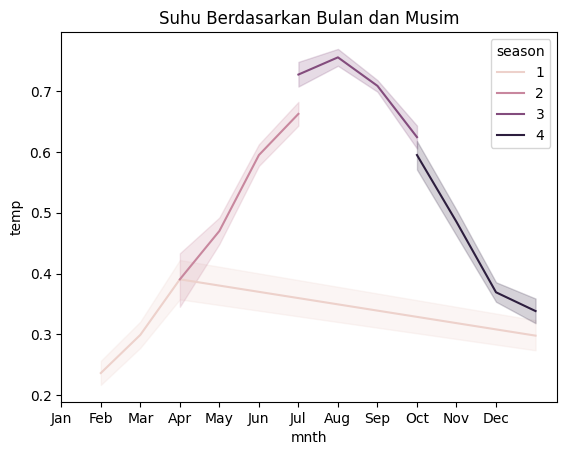

In [69]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Menambahkan nama bulan pada sumbu x
sns.lineplot(x='mnth', y='temp', hue='season', data=day_df)
plt.title('Suhu Berdasarkan Bulan dan Musim')
plt.xticks(ticks=range(12), labels=month_names)  # Ganti x-axis dengan nama bulan
plt.show()

In [70]:
print(day_df[['season', 'temp', 'hum']].head())


   season      temp       hum
0       1  0.344167  0.805833
1       1  0.363478  0.696087
2       1  0.196364  0.437273
3       1  0.200000  0.590435
4       1  0.226957  0.436957


In [71]:
# Rata-rata suhu untuk Spring dan Fall
spring_avg_temp = day_df[day_df['season'] == 1]['temp'].mean()
fall_avg_temp = day_df[day_df['season'] == 3]['temp'].mean()

print(f"Spring Avg Temp: {spring_avg_temp}")
print(f"Fall Avg Temp: {fall_avg_temp}")


Spring Avg Temp: 0.2977475491712708
Fall Avg Temp: 0.7063093085106382


In [72]:
# Verifikasi distribusi bulan per musim
month_to_season = day_df[['mnth', 'season']].drop_duplicates()
print(month_to_season)


     mnth  season
0       1       1
31      2       1
59      3       1
79      3       2
90      4       2
120     5       2
151     6       2
171     6       3
181     7       3
212     8       3
243     9       3
265     9       4
273    10       4
304    11       4
334    12       4
354    12       1


In [73]:
print(hour_df.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [74]:
# Fungsi untuk menetapkan musim berdasarkan bulan
def assign_season_by_month(month):
    if month in [12, 1, 2]:
        return 4  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

# Mengupdate kolom 'season' dengan musim yang benar
day_df['season_corrected'] = day_df['mnth'].apply(assign_season_by_month)
hour_df['season_corrected'] = hour_df['mnth'].apply(assign_season_by_month)


# Cek kembali hasilnya
print(day_df[['mnth', 'season', 'season_corrected']].drop_duplicates())

print(hour_df[['mnth', 'season', 'season_corrected']].drop_duplicates())


     mnth  season  season_corrected
0       1       1                 4
31      2       1                 4
59      3       1                 1
79      3       2                 1
90      4       2                 1
120     5       2                 1
151     6       2                 2
171     6       3                 2
181     7       3                 2
212     8       3                 2
243     9       3                 3
265     9       4                 3
273    10       4                 3
304    11       4                 3
334    12       4                 4
354    12       1                 4
      mnth  season  season_corrected
0        1       1                 4
688      2       1                 4
1337     3       1                 1
1807     3       2                 1
2067     4       2                 1
2786     5       2                 1
3530     6       2                 2
4010     6       3                 2
4250     7       3                 2
4994     8       3

In [75]:
# Menghitung rata-rata suhu dan kelembapan berdasarkan musim yang telah dikoreksi
temp_hum_by_season_corrected = day_df.groupby('season_corrected')[['temp', 'hum']].mean().reset_index()

# Menambahkan label nama musim
temp_hum_by_season_corrected['season_corrected'] = temp_hum_by_season_corrected['season_corrected'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Menampilkan hasil
print(temp_hum_by_season_corrected)


  season_corrected      temp       hum
0           Spring  0.485276  0.622199
1           Summer  0.716397  0.604108
2             Fall  0.490182  0.677959
3           Winter  0.286217  0.607521


In [76]:
# Menghitung rata-rata suhu dan kelembapan berdasarkan musim yang telah dikoreksi
temp_hum_by_season_corrected = day_df.groupby('season_corrected')[['temp', 'hum']].mean().reset_index()

# Menambahkan label nama musim
temp_hum_by_season_corrected['season_corrected'] = temp_hum_by_season_corrected['season_corrected'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Menampilkan tabel hasil
print(temp_hum_by_season_corrected)


  season_corrected      temp       hum
0           Spring  0.485276  0.622199
1           Summer  0.716397  0.604108
2             Fall  0.490182  0.677959
3           Winter  0.286217  0.607521


<ipython-input-77-60cc0bab4d59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_corrected', y='temp', data=season_filtered_corrected, palette='coolwarm')
<ipython-input-77-60cc0bab4d59>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_corrected', y='hum', data=season_filtered_corrected, palette='coolwarm')


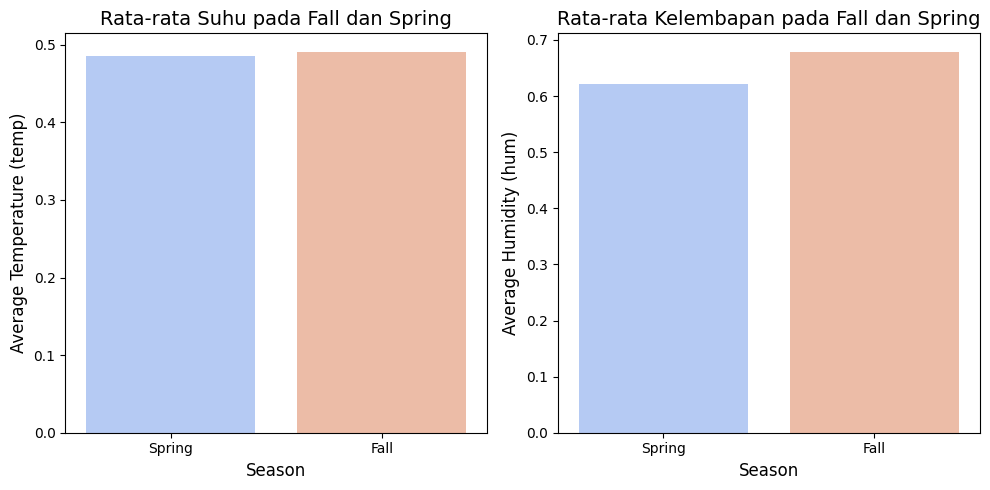

In [77]:
# Visualisasi suhu dan kelembapan pada Fall dan Spring agar bisa dilihat berapa suhu yang cenderung seseorang menggunakan sepeda
season_filtered_corrected = temp_hum_by_season_corrected[temp_hum_by_season_corrected['season_corrected'].isin(['Spring', 'Fall'])]

plt.figure(figsize=(10, 5))

# Grafik Suhu
plt.subplot(1, 2, 1)
sns.barplot(x='season_corrected', y='temp', data=season_filtered_corrected, palette='coolwarm')
plt.title('Rata-rata Suhu pada Fall dan Spring', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Temperature (temp)', fontsize=12)

# Grafik Kelembapan
plt.subplot(1, 2, 2)
sns.barplot(x='season_corrected', y='hum', data=season_filtered_corrected, palette='coolwarm')
plt.title('Rata-rata Kelembapan pada Fall dan Spring', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Humidity (hum)', fontsize=12)

plt.tight_layout()
plt.show()


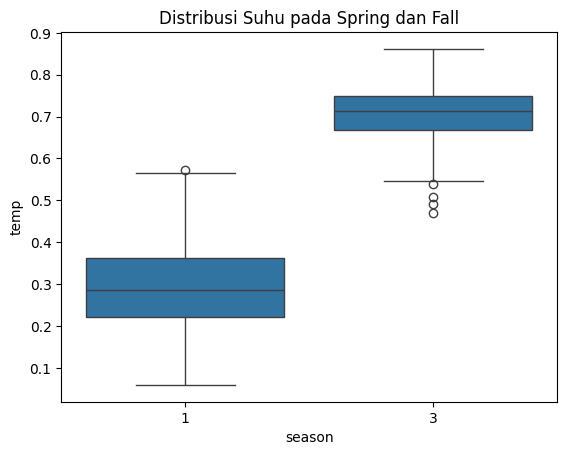

In [78]:
sns.boxplot(x='season', y='temp', data=day_df[day_df['season'].isin([1, 3])])
plt.title('Distribusi Suhu pada Spring dan Fall')
plt.show()


In [79]:
Q1 = day_df['temp'].quantile(0.25)
Q3 = day_df['temp'].quantile(0.75)
IQR = Q3 - Q1

# Filter untuk data tanpa outlier
day_df_no_outlier = day_df[
    ~((day_df['temp'] < (Q1 - 1.5 * IQR)) | (day_df['temp'] > (Q3 + 1.5 * IQR)))
]


In [80]:
# Filter data hanya untuk Fall dan Spring
fall_spring_data = day_df[day_df['season_corrected'].isin(['Spring', 'Fall'])]

# Menghitung Q1, Q3, dan IQR untuk suhu
Q1 = fall_spring_data['temp'].quantile(0.25)
Q3 = fall_spring_data['temp'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter data tanpa outlier
fall_spring_no_outliers = fall_spring_data[
    (fall_spring_data['temp'] >= lower_bound) & (fall_spring_data['temp'] <= upper_bound)
]

# Periksa jumlah data sebelum dan sesudah menghapus outlier
print(f"Jumlah data awal: {len(fall_spring_data)}")
print(f"Jumlah data setelah outlier dihapus: {len(fall_spring_no_outliers)}")


Lower Bound: nan, Upper Bound: nan
Jumlah data awal: 0
Jumlah data setelah outlier dihapus: 0


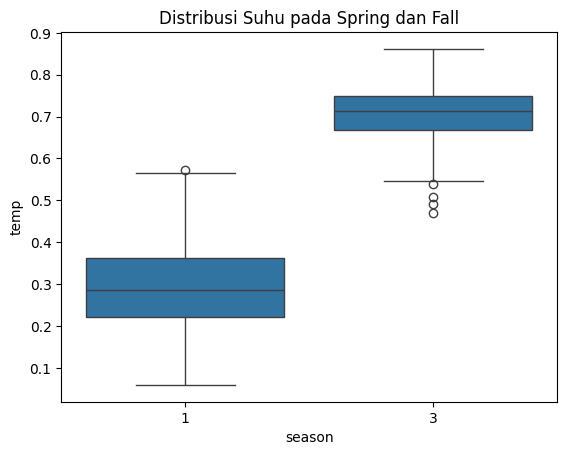

In [81]:
sns.boxplot(x='season', y='temp', data=day_df[day_df['season'].isin([1, 3])])
plt.title('Distribusi Suhu pada Spring dan Fall')
plt.show()


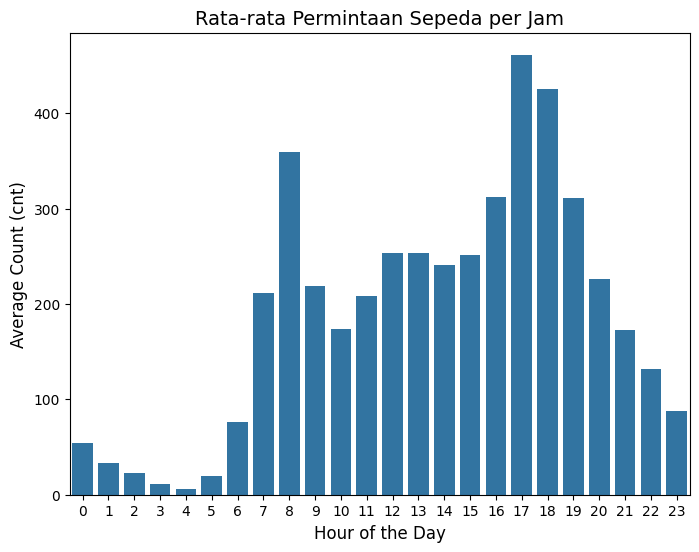

In [82]:
# Menghitung rata-rata permintaan per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='hr', y='cnt', data=hourly_avg)
plt.title('Rata-rata Permintaan Sepeda per Jam', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.show()


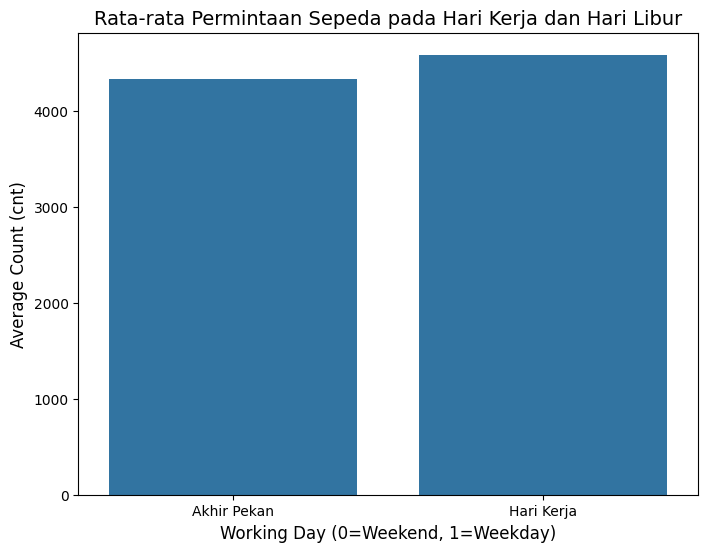

In [83]:
# Menghitung rata-rata pemintaan pada weekday dan weekend
workingday_avg = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_avg)
plt.title('Rata-rata Permintaan Sepeda pada Hari Kerja dan Hari Libur', fontsize=14)
plt.xlabel('Working Day (0=Weekend, 1=Weekday)', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.show()

<Axes: xlabel='temp', ylabel='Count'>

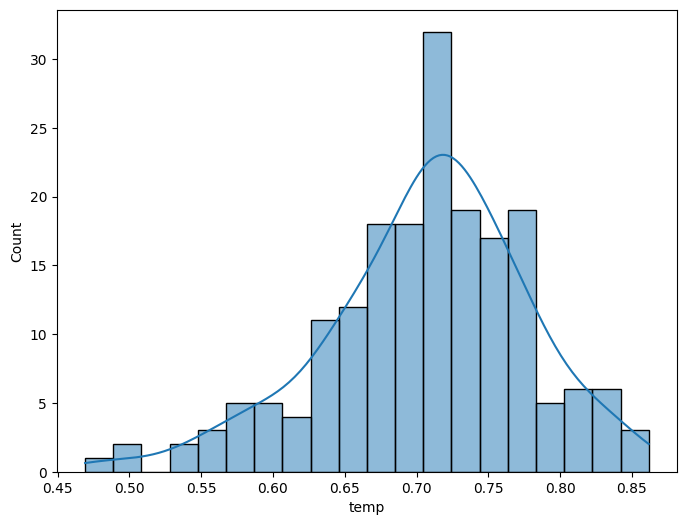

In [84]:
# Melihat suhu saat fall
fall_temp = day_df[day_df['season'] == 3]['temp']

# Visualisasi
plt.figure(figsize=(8, 6))
sns.histplot(fall_temp, bins=20, kde=True)

In [85]:
from scipy.stats import ttest_ind

# Data permintaan pada hari kerja dan akhir pekan
weekday_data = day_df[day_df['workingday'] == 1]['cnt']
weekend_data = day_df[day_df['workingday'] == 0]['cnt']

# Melakukan uji t
t_stat, p_value = ttest_ind(weekday_data, weekend_data)

print(f'Nilai t-statistik: {t_stat}')
print(f'Nilai p: {p_value}')

# Interpretasi hasil
if p_value < 0.05:
    print("Ada perbedaan signifikan antara hari kerja dan akhir pekan.")
else:
    print("Tidak ada perbedaan signifikan antara hari kerja dan akhir pekan.")


Nilai t-statistik: 1.6543102137118633
Nilai p: 0.09849496160024913
Tidak ada perbedaan signifikan antara hari kerja dan akhir pekan.


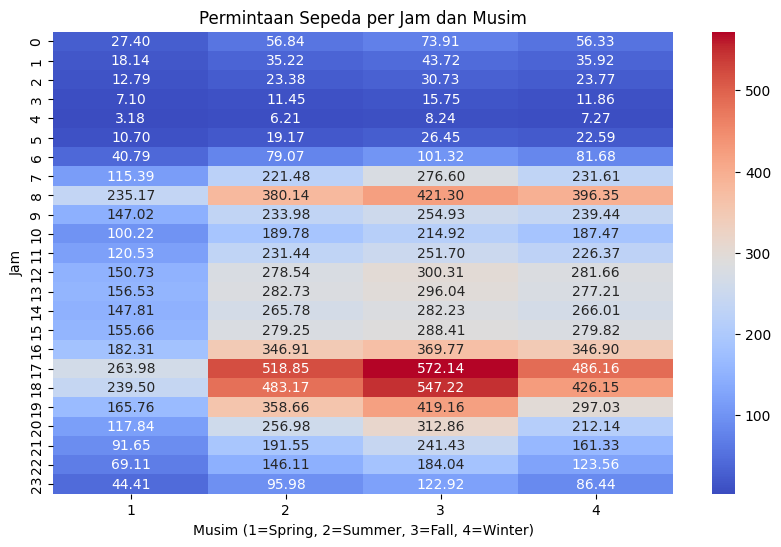

In [86]:
# Menghitung rata-rata permintaan berdasarkan jam dan musim
demand_by_time_and_season = hour_df.pivot_table(values='cnt', index='hr', columns='season', aggfunc='mean')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.heatmap(demand_by_time_and_season, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Permintaan Sepeda per Jam dan Musim')
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Jam')
plt.show()

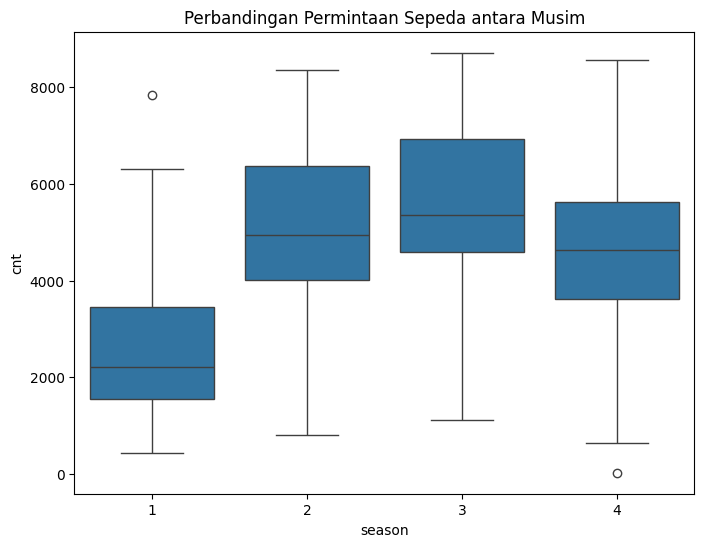

In [87]:
# Visualisasi perbandingan permintaan per musim
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Perbandingan Permintaan Sepeda antara Musim')
plt.show()


In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           731 non-null    int64  
 1   dteday            731 non-null    object 
 2   season            731 non-null    int64  
 3   yr                731 non-null    int64  
 4   mnth              731 non-null    int64  
 5   holiday           731 non-null    int64  
 6   weekday           731 non-null    int64  
 7   workingday        731 non-null    int64  
 8   weathersit        731 non-null    int64  
 9   temp              731 non-null    float64
 10  atemp             731 non-null    float64
 11  hum               731 non-null    float64
 12  windspeed         731 non-null    float64
 13  casual            731 non-null    float64
 14  registered        731 non-null    int64  
 15  cnt               731 non-null    int64  
 16  season_corrected  731 non-null    int64  
dt

    mnth          cnt
0      1  2176.338710
1      2  2655.298246
2      3  3692.258065
3      4  4484.900000
4      5  5349.774194
5      6  5772.366667
6      7  5563.677419
7      8  5664.419355
8      9  5766.516667
9     10  5199.225806
10    11  4247.183333
11    12  3403.806452


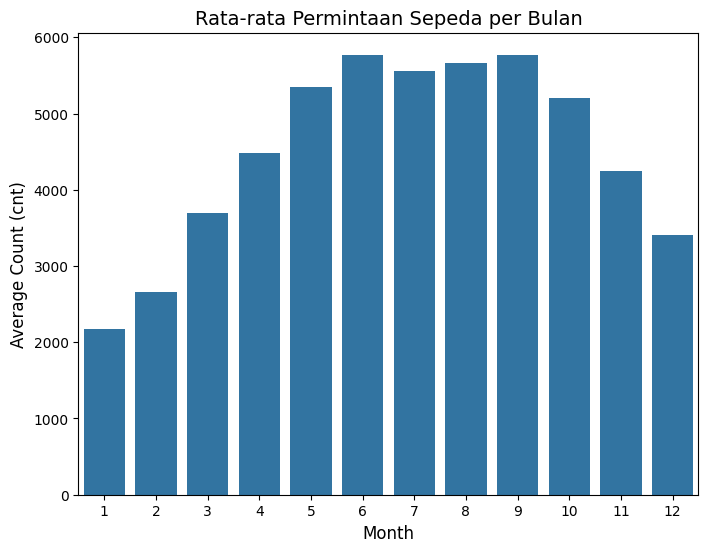

In [89]:
# Menhitung rata-rata pengguna berdasarkan bulan
monthly_avg = day_df.groupby('mnth')['cnt'].mean().reset_index()
print(monthly_avg)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_avg)
plt.title('Rata-rata Permintaan Sepeda per Bulan', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.show()

**Insight:**

1.   Permintaan sepeda paling banyak pada saat: Fall , di jam 17-18 dan 8 pagi.


2.   Permintaan sepeda paling sedikit pada saat: Spring, di jam 3-4 pagi

3. Pada weekend dan weekday tidak terdapat perbedaan signifikan dalam pola penggunaan **Namun weekday tetap yang lebih tinggi**

4. Penggunaan tertinggi ada dibulan Juni dan September



### Segmentasi Pengguna

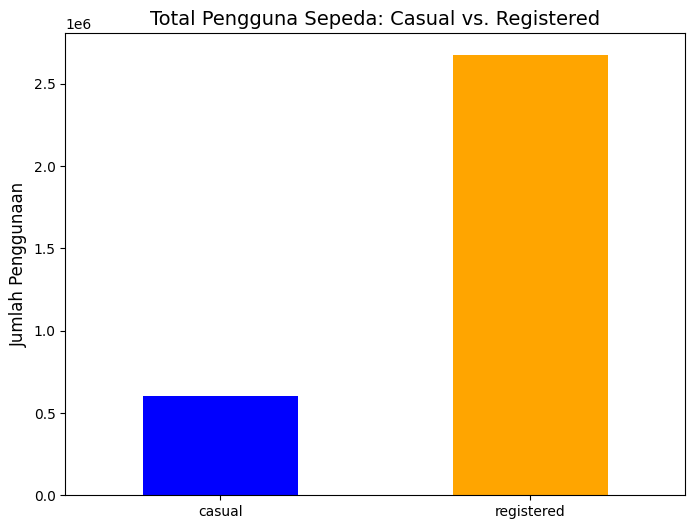

In [90]:
# Menghitung total pengguna berdasarkan kategori
user_segmentation = day_df[['casual', 'registered']].sum()

# Visualisasi
plt.figure(figsize=(8, 6))
user_segmentation.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Pengguna Sepeda: Casual vs. Registered', fontsize=14)
plt.ylabel('Jumlah Penggunaan', fontsize=12)
plt.xticks(rotation=0)
plt.show()


   is_weekend       casual   registered
0           0   606.165500  3978.250000
1           1  1296.732684  2959.034632


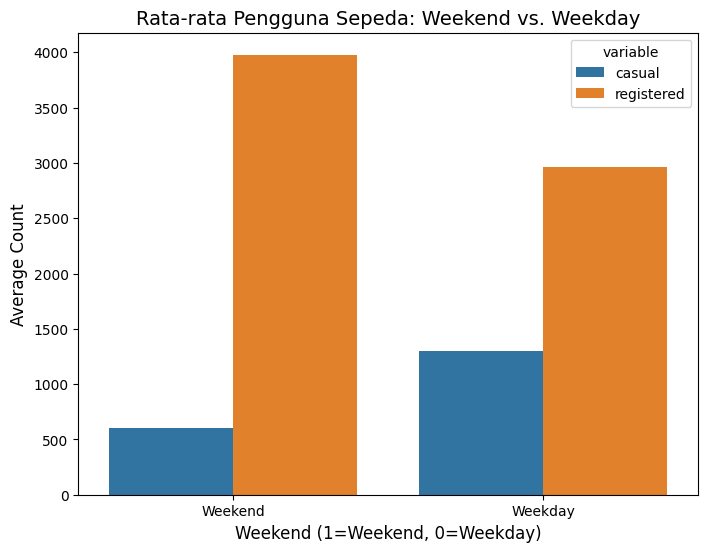

In [91]:
# Menghitung rata-rata jumlah pengguna berdasarkan weekend dan weekday

#Menambahkan kolom 'is_weekend' untuk membedakan weekend dan weekday
day_df['is_weekend'] = day_df['workingday'].apply(lambda x: 1 if x == 0 else 0)

# Menghitung rata-rata pengguna berdasarkan is weekend
user_by_weekend = day_df.groupby('is_weekend')[['casual', 'registered']].mean().reset_index()
print(user_by_weekend)

# Visualisasi
plt.figure(figsize=(8,6))
user_by_weekend_melted = user_by_weekend.melt(id_vars='is_weekend', value_vars=['casual', 'registered'])
sns.barplot(x='is_weekend', y='value', hue='variable', data=user_by_weekend_melted)
plt.title('Rata-rata Pengguna Sepeda: Weekend vs. Weekday', fontsize=14)
plt.xlabel('Weekend (1=Weekend, 0=Weekday)', fontsize=12)
plt.ylabel('Average Count', fontsize=12)
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()


In [92]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           731 non-null    int64  
 1   dteday            731 non-null    object 
 2   season            731 non-null    int64  
 3   yr                731 non-null    int64  
 4   mnth              731 non-null    int64  
 5   holiday           731 non-null    int64  
 6   weekday           731 non-null    int64  
 7   workingday        731 non-null    int64  
 8   weathersit        731 non-null    int64  
 9   temp              731 non-null    float64
 10  atemp             731 non-null    float64
 11  hum               731 non-null    float64
 12  windspeed         731 non-null    float64
 13  casual            731 non-null    float64
 14  registered        731 non-null    int64  
 15  cnt               731 non-null    int64  
 16  season_corrected  731 non-null    int64  
 1

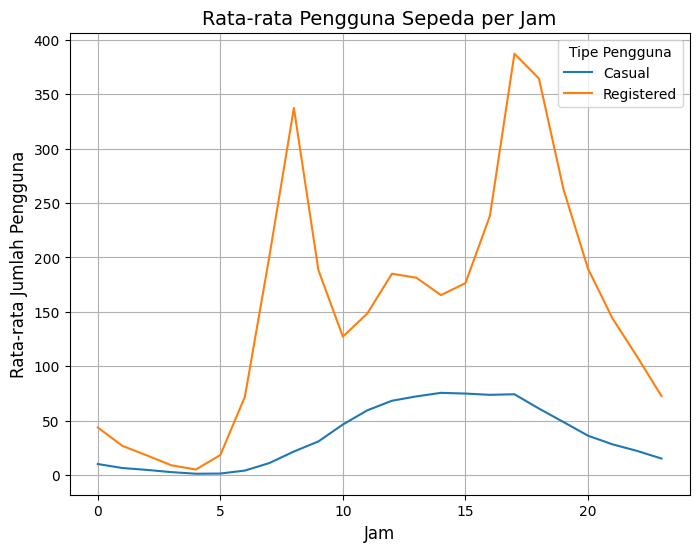

In [93]:
# Menghitung rata-rata jumlah penggunak per jam untuk casual dan registered
hourly_activity = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.lineplot(x='hr', y='casual', data=hourly_activity, label='Casual')
sns.lineplot(x='hr', y='registered', data=hourly_activity, label='Registered')
plt.title('Rata-rata Pengguna Sepeda per Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna')
plt.grid()
plt.show()

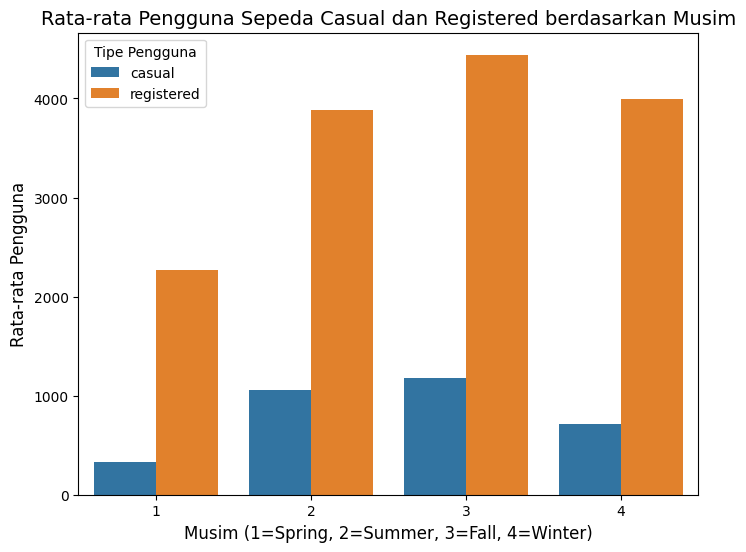

In [94]:
# Menghitung rata-rata pengguna casual dan registered berdasarkan musim
casual_by_season = day_df.groupby('season')['casual'].mean().reset_index()
registered_by_season = day_df.groupby('season')['registered'].mean().reset_index()

# Menggabungkan tabel casual dan registered berdasarkan musim
season_avg = pd.merge(casual_by_season, registered_by_season, on='season', suffixes=('_casual', '_registered'))

# Mengubah format tabel
season_avg_melted = season_avg.melt(id_vars='season', value_vars=['casual', 'registered'])

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='value', hue='variable', data=season_avg_melted)
plt.title('Rata-rata Pengguna Sepeda Casual dan Registered berdasarkan Musim', fontsize=14)
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Rata-rata Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna')
plt.show()


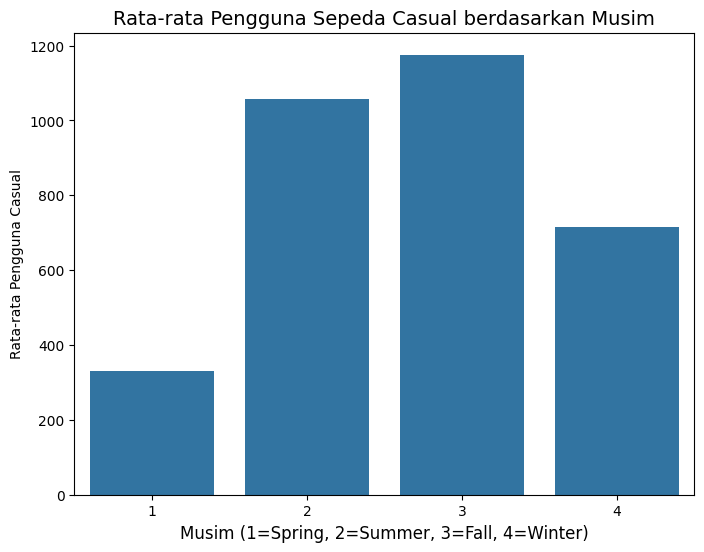

In [95]:
# Menhitung rata-rata pengguna casual berdasarkan musim
casual_by_season = day_df.groupby('season')['casual'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='casual', data=casual_by_season)
plt.title('Rata-rata Pengguna Sepeda Casual berdasarkan Musim', fontsize=14)
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Rata-rata Pengguna Casual')
plt.show()

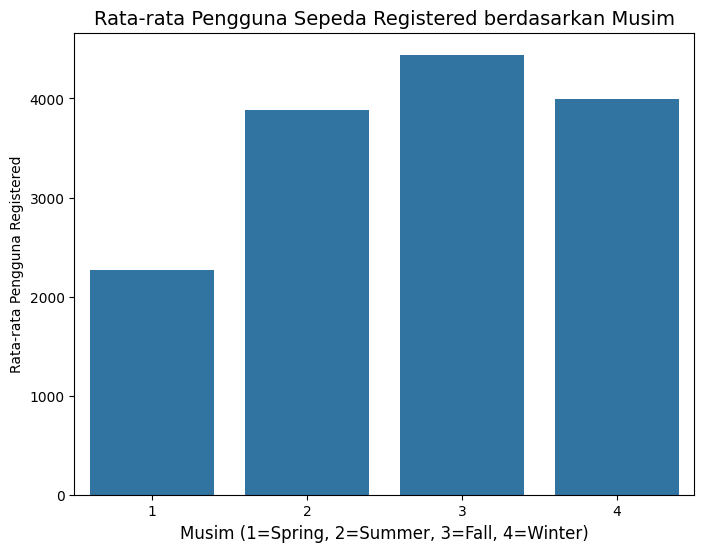

In [96]:
# Menhitung rata-rata pengguna registered berdasarkan musim
casual_by_season = day_df.groupby('season')['registered'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='registered', data=casual_by_season)
plt.title('Rata-rata Pengguna Sepeda Registered berdasarkan Musim', fontsize=14)
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Rata-rata Pengguna Registered')
plt.show()

<Figure size 1000x600 with 0 Axes>

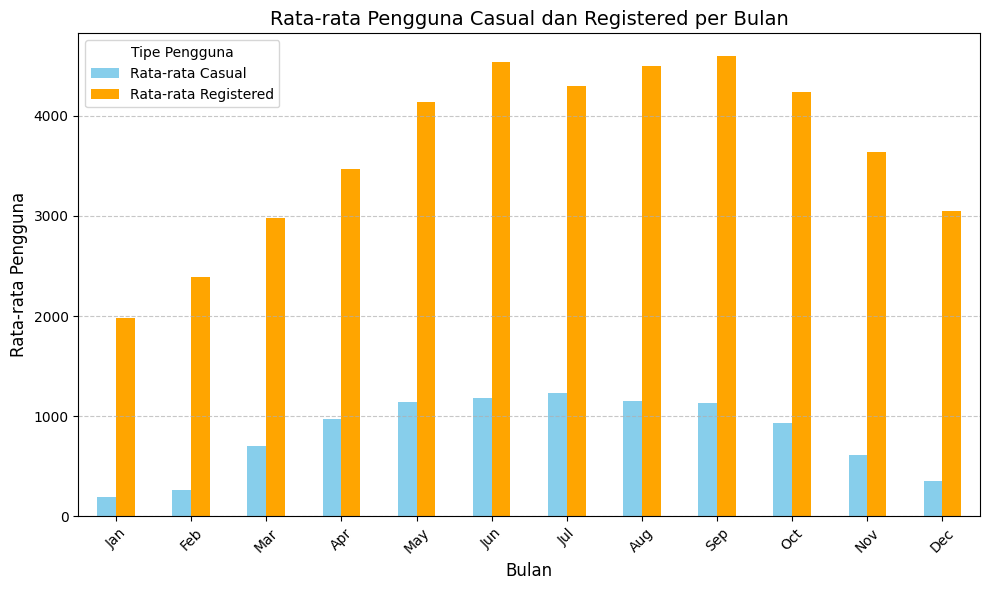

In [97]:
# Menghitung rata-rata pengguna casual dan registered per bulan
monthly_avg = day_df.groupby('mnth')[['casual', 'registered']].mean().reset_index()

# Mengubah format tabel
monthly_avg.columns = ['Bulan', 'Rata-rata Casual', 'Rata-rata Registered']


# Visualisasi
plt.figure(figsize=(10, 6))
monthly_avg.plot(x='Bulan', kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Rata-rata Pengguna Casual dan Registered per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Pengguna', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Insight:

1. Pengguna yang terdaftar lebih banyak hampir 5 kali lipat daripada kasual

2. Pengguna Casual:

*   lebih banyak saat **weekday**
*   lebih aktif pada jam 1-5 sore
*   lebih banyak pada musim Fall dan Summer
*   paling sedikit saat musim Spring
*   paling banyak dibukan juli
*   paling sedikit dibulan jan



3. Pengguna Registered:

*   lebih banyak saat **weekend**
*   paling aktif pada jam 7-8pagi dan 5-6sore
*   Lebih banyak pada musim Fall dan Winter
*   Paling sedikit saat musim Spring
*   paling banyak dibukan Juni dan September
*   paling sedikit dibulan Jan

### Pola penggunaan berdasarkan faktor cuaca dan lingkungan

<ipython-input-98-7ac5412f6997>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_effect, palette='coolwarm')


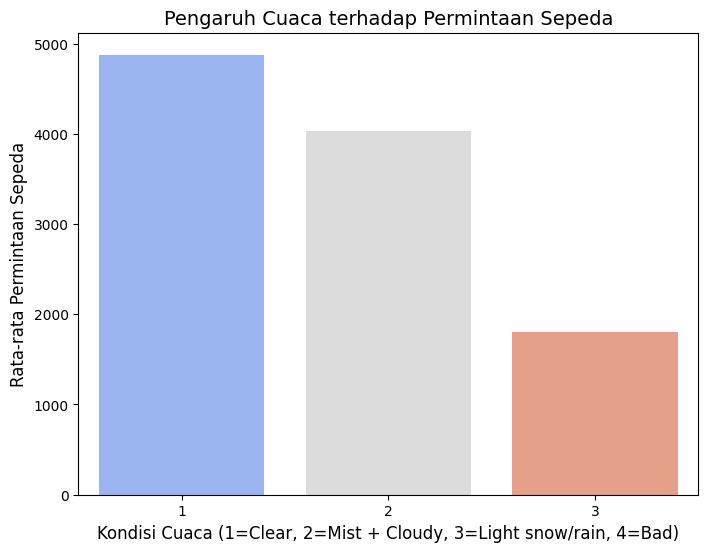

In [98]:
# Rata-rata permintaan based on kondisi cuaca
weather_effect = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_effect, palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Permintaan Sepeda', fontsize=14)
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist + Cloudy, 3=Light snow/rain, 4=Bad)', fontsize=12)
plt.ylabel('Rata-rata Permintaan Sepeda', fontsize=12)
plt.show()

In [99]:
# Memastikan tidak ada permintaan saat cuaca sangat buruk (4)
weather_worsening = day_df[day_df['weathersit'] == 4]
print(weather_worsening[['weathersit', 'cnt']])

total_cnt_weather_worsening = weather_worsening['cnt'].sum()
average_cnt_weather_worsening = weather_worsening['cnt'].mean()
print(f"Total permintaan saat cuaca sangat buruk: {total_cnt_weather_worsening}")
print(f"Rata-rata permintaan saat cuaca sangat buruk: {average_cnt_weather_worsening}")

if 4 not in weather_effect['weathersit'].values:
    print("Tidak ada permintaan saat cuaca sangat buruk.")
else:
    print("Terdapat permintaan saat cuaca sangat buruk.")

Empty DataFrame
Columns: [weathersit, cnt]
Index: []
Total permintaan saat cuaca sangat buruk: 0
Rata-rata permintaan saat cuaca sangat buruk: nan
Tidak ada permintaan saat cuaca sangat buruk.


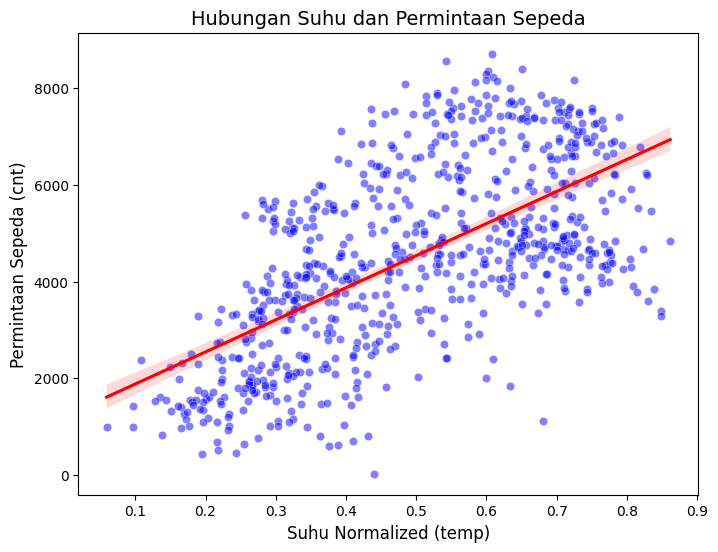

In [100]:
# Hubungan Suhu dan Permintaan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='blue', alpha=0.5)
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, color='red')
plt.title('Hubungan Suhu dan Permintaan Sepeda', fontsize=14)
plt.xlabel('Suhu Normalized (temp)', fontsize=12)
plt.ylabel('Permintaan Sepeda (cnt)', fontsize=12)
plt.show()

In [101]:
# melihat tabel cnt
day_df[['temp', 'cnt']]

,temp,cnt
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600
...,...,...
726,0.254167,2114
727,0.253333,3095
728,0.253333,1341
729,0.255833,1796


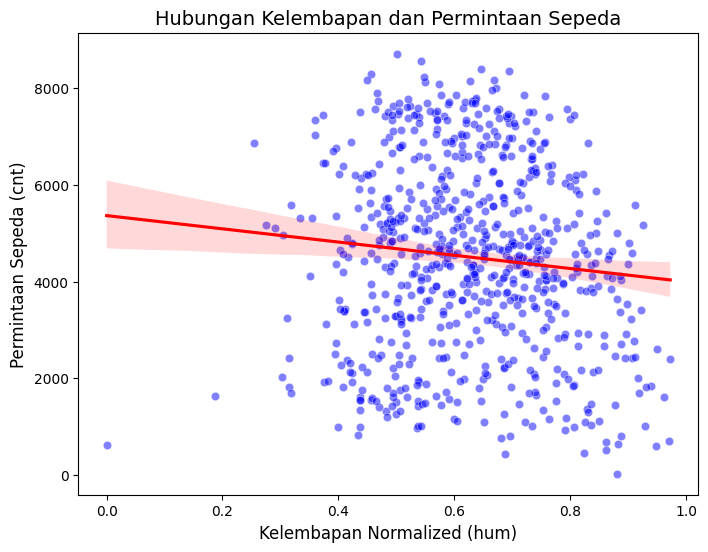

In [102]:
# Hubungan kelembapan dan permintaan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df, color='blue', alpha=0.5)
sns.regplot(x='hum', y='cnt', data=day_df, scatter=False, color='red')
plt.title('Hubungan Kelembapan dan Permintaan Sepeda', fontsize=14)
plt.xlabel('Kelembapan Normalized (hum)', fontsize=12)
plt.ylabel('Permintaan Sepeda (cnt)', fontsize=12)
plt.show()

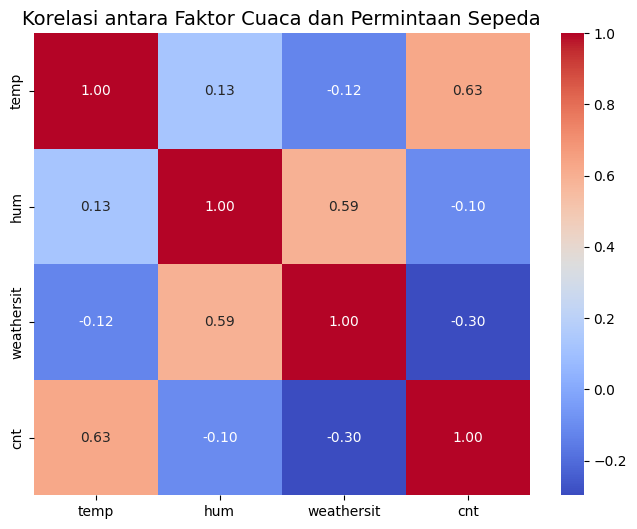

In [103]:
# Korelasi antara faktor cuaca dan permintaan
correlation_weather = day_df[['temp', 'hum','weathersit', 'cnt']].corr()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_weather, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Faktor Cuaca dan Permintaan Sepeda', fontsize=14)
plt.show()

**Insight:**

1. Cuaca sangat memnentukan pola penggunaan, paling banyak ketika cuaca cerah dan tidak ada penggunaan saat cuara sangat buruk

2. Suhu merupakan salah satu faktor yang mempengaruhi permintaan sepeda. Ketika suhu lebih tinggi (hangat) orang cenderung lebih sering bersepeda

3. Permintaan penggunaan sepeda cenderung menurun ketika ada kenaikan tingkat kelembapan

### Analisis pengaruh hari libur


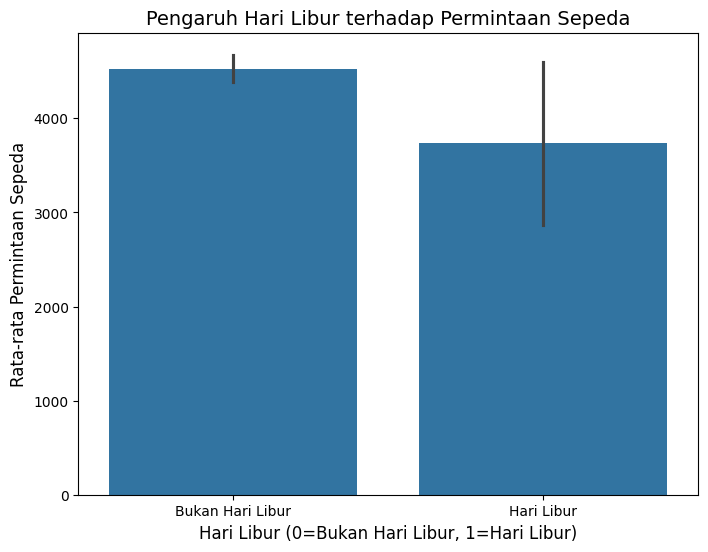

In [104]:
# Menghitung rata-rata permintaan pada hari libur dan bukan hari libur
holiday_effect = day_df.groupby('holiday')['cnt'].mean().reset_index

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=day_df)
plt.title('Pengaruh Hari Libur terhadap Permintaan Sepeda', fontsize=14)
plt.xlabel('Hari Libur (0=Bukan Hari Libur, 1=Hari Libur)', fontsize=12)
plt.ylabel('Rata-rata Permintaan Sepeda', fontsize=12)
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])
plt.show()

Insight:

1. Permintaan sepeda pada hari libur lebih rendah dari pada bukan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Permintaan dan Pola penggunaan


1.   Bagaimana pola permintaan sepeda di berbagai musim?
*   Apakah musim panas memiliki lebih banyak permintaan dibandingkan musim dingin?
2.   Jam berapa yang memiliki permintaan tertingginuntuk penyewaan sepeda?
*   Apakah pada jam berangkat kerja (pagi) atau jam pulang kerja (sore)
3. Apakah ada perbedaan pola penggunaan sepeda pada hari kerja dibandingkan akhir pekan?

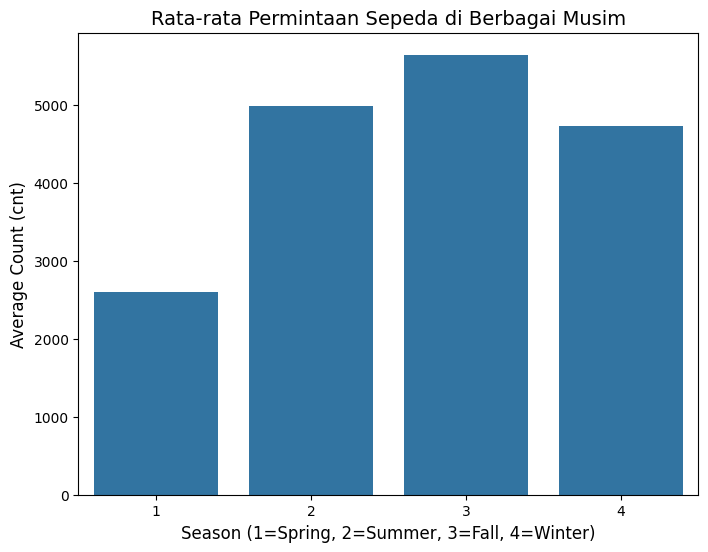

In [105]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_avg_rent)
plt.title('Rata-rata Permintaan Sepeda di Berbagai Musim', fontsize=14)
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.show()

<ipython-input-106-60cc0bab4d59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_corrected', y='temp', data=season_filtered_corrected, palette='coolwarm')
<ipython-input-106-60cc0bab4d59>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_corrected', y='hum', data=season_filtered_corrected, palette='coolwarm')


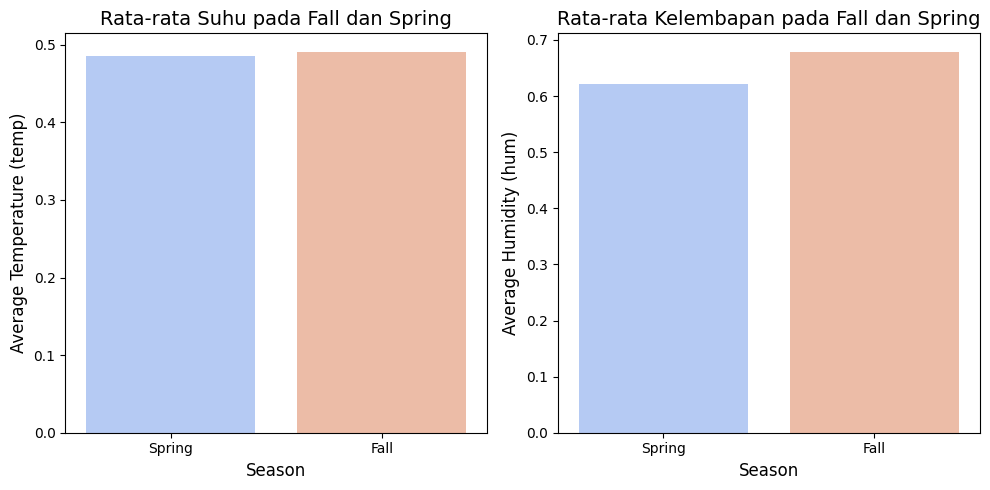

In [106]:
# Visualisasi suhu dan kelembapan pada Fall dan Spring agar bisa dilihat berapa suhu yang cenderung seseorang menggunakan sepeda
season_filtered_corrected = temp_hum_by_season_corrected[temp_hum_by_season_corrected['season_corrected'].isin(['Spring', 'Fall'])]

plt.figure(figsize=(10, 5))

# Grafik Suhu
plt.subplot(1, 2, 1)
sns.barplot(x='season_corrected', y='temp', data=season_filtered_corrected, palette='coolwarm')
plt.title('Rata-rata Suhu pada Fall dan Spring', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Temperature (temp)', fontsize=12)

# Grafik Kelembapan
plt.subplot(1, 2, 2)
sns.barplot(x='season_corrected', y='hum', data=season_filtered_corrected, palette='coolwarm')
plt.title('Rata-rata Kelembapan pada Fall dan Spring', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Humidity (hum)', fontsize=12)

plt.tight_layout()
plt.show()


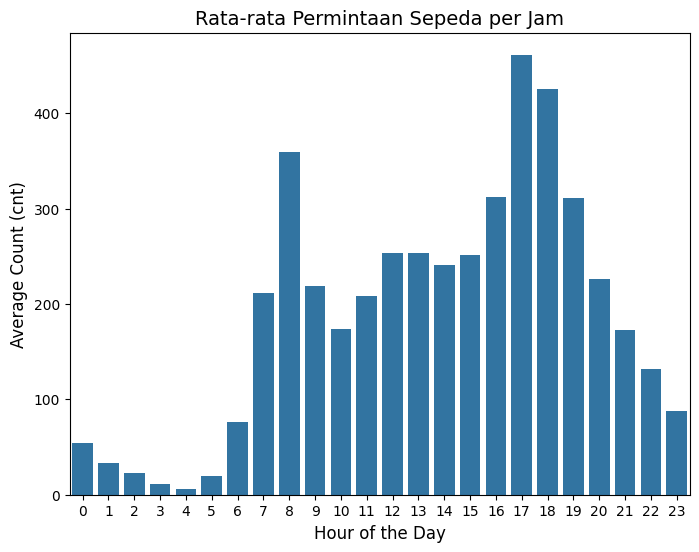

In [107]:
# Menghitung rata-rata permintaan per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='hr', y='cnt', data=hourly_avg)
plt.title('Rata-rata Permintaan Sepeda per Jam', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.show()


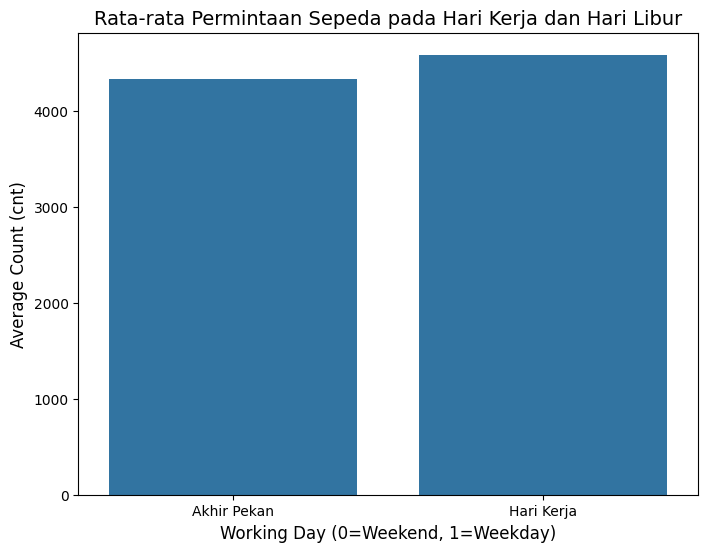

In [108]:
# Menghitung rata-rata pemintaan pada weekday dan weekend
workingday_avg = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_avg)
plt.title('Rata-rata Permintaan Sepeda pada Hari Kerja dan Hari Libur', fontsize=14)
plt.xlabel('Working Day (0=Weekend, 1=Weekday)', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.show()

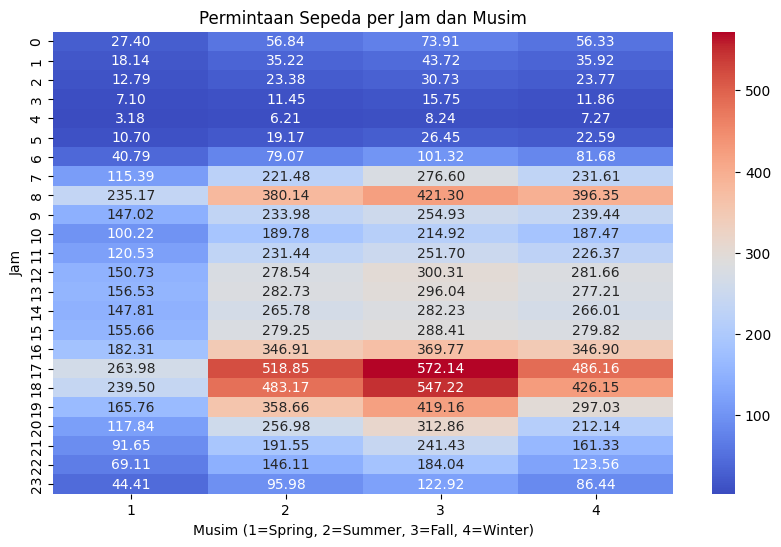

In [109]:
# Menghitung rata-rata permintaan berdasarkan jam dan musim
demand_by_time_and_season = hour_df.pivot_table(values='cnt', index='hr', columns='season', aggfunc='mean')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.heatmap(demand_by_time_and_season, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Permintaan Sepeda per Jam dan Musim')
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Jam')
plt.show()

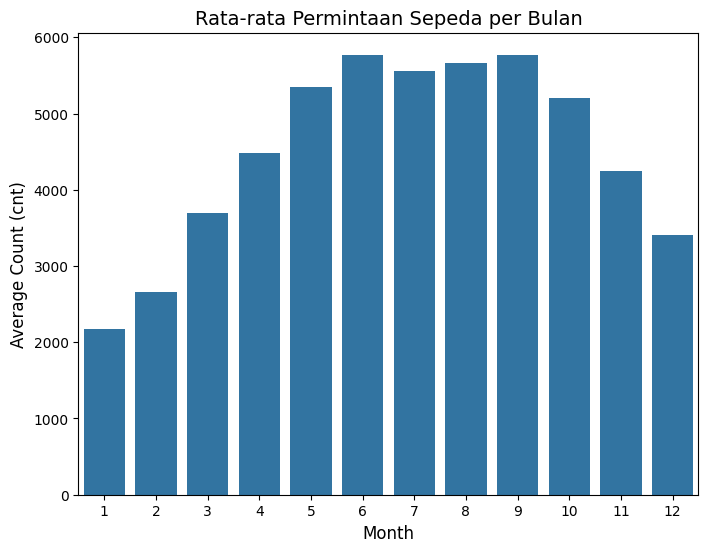

In [110]:
# Menhitung rata-rata pengguna berdasarkan bulan
monthly_avg = day_df.groupby('mnth')['cnt'].mean().reset_index()
monthly_avg

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_avg)
plt.title('Rata-rata Permintaan Sepeda per Bulan', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Count (cnt)', fontsize=12)
plt.show()

**Insight dan penjelasan:**

**1. Musim berpengaruh pada Permintaan**
*   Pada musim Fall, permintaan sepeda meningkat, terutama pada jam 17-18 sore dan 8 pagi. Hal ini kemungkinan besar dipengaruhi oleh waktu sibuk seperti jam pulang kerja dan berangkat kerja, serta cuaca yang lebih mendukung. Selain itu, kelembapan yang lebih tinggi di Fall (dibandingkan musim lainnya) juga dapat memberikan kenyamanan bagi pengguna sepeda. Hal ini juga menunjukkan bahwa cuaca yang mendukung dan aktivitas rutin seperti perjalanan kerja memainkan peran penting dalam meningkatkan permintaan.


**2. Jam Non-Sibuk Menunjukkan Penurunan**
*   Sebaliknya, Pada musim Spring, terdapat penurunan permintaan, terutama pada jam 3-4 pagi. Hal ini kemungkinan besar disebabkan oleh faktor cuaca yang kurang mendukung atau pola tidur masyarakat yang membuat penggunaan sepeda pada jam tersebut sangat rendah.

**3. Kondisi Cuaca Mempengaruhi Aktivitas**
*  Suhu pada Spring dan Fall tidak berbeda jauh, namun kelembapan di musim Fall lebih tinggi, yang mendukung kenyamanan bersepeda. Meskipun demikian, Fall cenderung mendorong lebih banyak aktivitas bersepeda daripada Spring, karena kombinasi suhu yang sedikit lebih hangat dan kelembapan yang lebih tinggi.



*   Meskipun ada sedikit perbedaan dalam pola penggunaan sepeda antara weekend dan weekeday, weekday tetap menunjukkan angka yang lebih tinggi, kemungkinan karena lebih banyak orang yang menggunakan sepeda untuk keperluan sehari-hari (misal untuk bekerja dll)




### Pertanyaan 2: Segmentasi Pengguna


1.   Siapa pengguna utama sepeda? (casual / Registered)
*   Apakah pengguna registered lebih sering menggunakan sepeda dibandingkan pengguna casual?
2.   Kapan pengguna Casual lebih aktif dibandingkan pengguna Registered?
*   Apakah pengguna Casual lebih banyak diakhir pekan, atau di musim-musim tertentu?

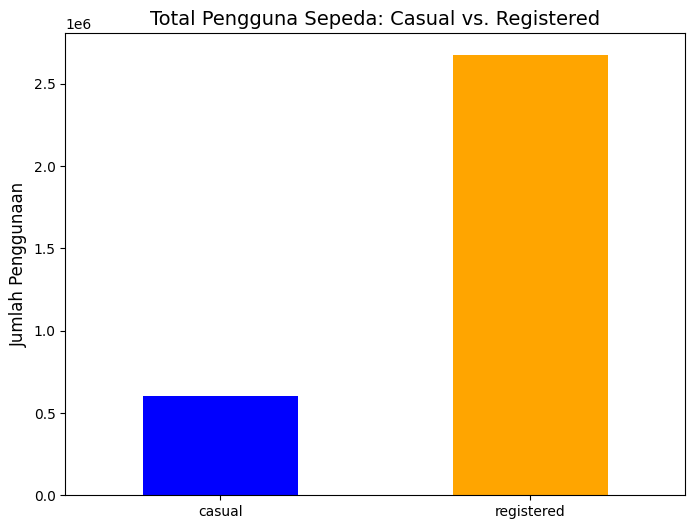

In [111]:
# Menghitung total pengguna berdasarkan kategori
user_segmentation = day_df[['casual', 'registered']].sum()

# Visualisasi
plt.figure(figsize=(8, 6))
user_segmentation.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Pengguna Sepeda: Casual vs. Registered', fontsize=14)
plt.ylabel('Jumlah Penggunaan', fontsize=12)
plt.xticks(rotation=0)
plt.show()


   is_weekend       casual   registered
0           0   606.165500  3978.250000
1           1  1296.732684  2959.034632


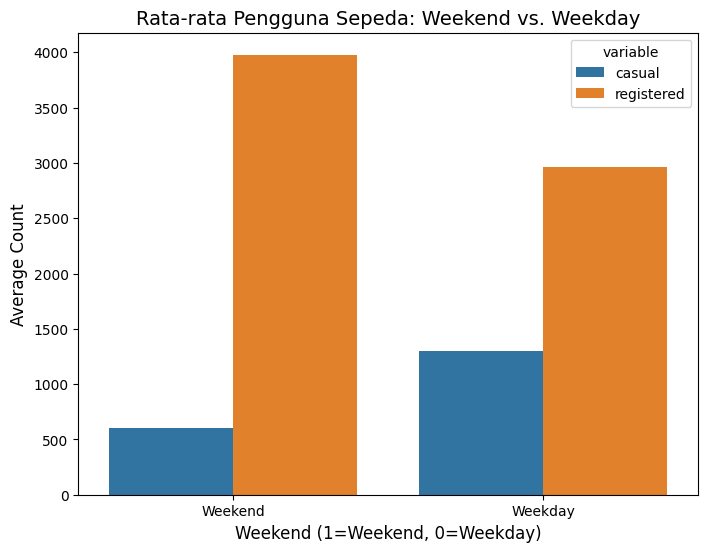

In [112]:
# Menghitung rata-rata jumlah pengguna berdasarkan weekend dan weekday

#Menambahkan kolom 'is_weekend' untuk membedakan weekend dan weekday
day_df['is_weekend'] = day_df['workingday'].apply(lambda x: 1 if x == 0 else 0)

# Menghitung rata-rata pengguna berdasarkan is weekend
user_by_weekend = day_df.groupby('is_weekend')[['casual', 'registered']].mean().reset_index()
print(user_by_weekend)

# Visualisasi
plt.figure(figsize=(8,6))
user_by_weekend_melted = user_by_weekend.melt(id_vars='is_weekend', value_vars=['casual', 'registered'])
sns.barplot(x='is_weekend', y='value', hue='variable', data=user_by_weekend_melted)
plt.title('Rata-rata Pengguna Sepeda: Weekend vs. Weekday', fontsize=14)
plt.xlabel('Weekend (1=Weekend, 0=Weekday)', fontsize=12)
plt.ylabel('Average Count', fontsize=12)
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()


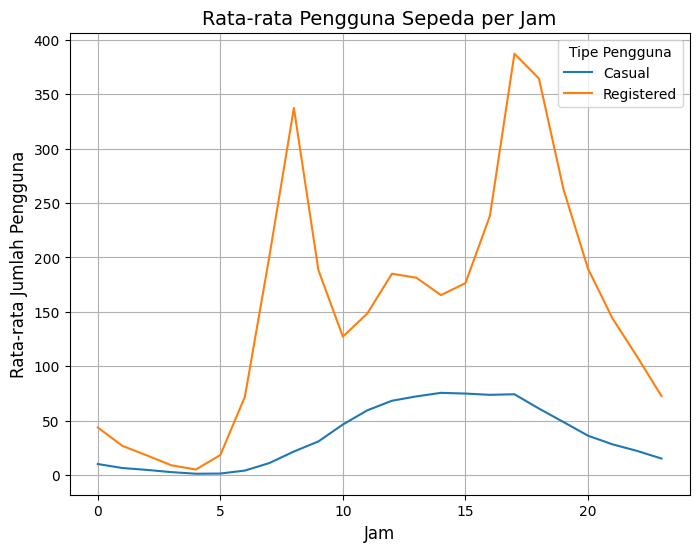

In [113]:
# Menghitung rata-rata jumlah penggunak per jam untuk casual dan registered
hourly_activity = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.lineplot(x='hr', y='casual', data=hourly_activity, label='Casual')
sns.lineplot(x='hr', y='registered', data=hourly_activity, label='Registered')
plt.title('Rata-rata Pengguna Sepeda per Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna')
plt.grid()
plt.show()

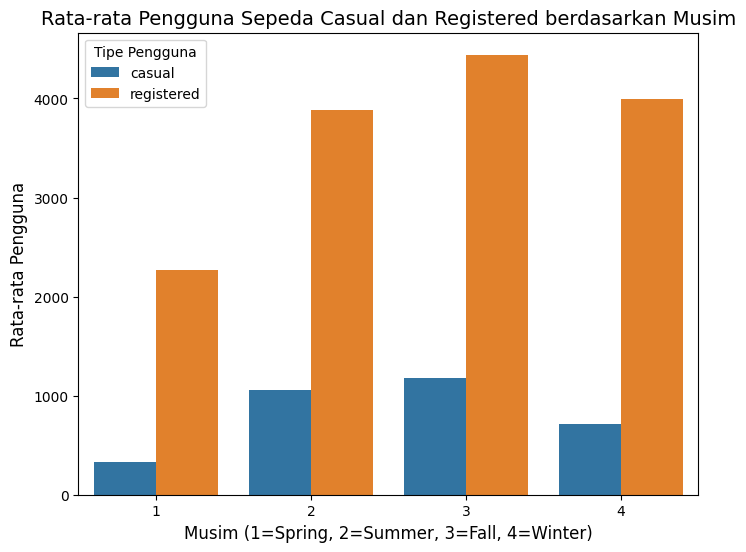

In [114]:
# Menghitung rata-rata pengguna casual dan registered berdasarkan musim
casual_by_season = day_df.groupby('season')['casual'].mean().reset_index()
registered_by_season = day_df.groupby('season')['registered'].mean().reset_index()

# Menggabungkan tabel casual dan registered berdasarkan musim
season_avg = pd.merge(casual_by_season, registered_by_season, on='season', suffixes=('_casual', '_registered'))

# Mengubah format tabel
season_avg_melted = season_avg.melt(id_vars='season', value_vars=['casual', 'registered'])

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='value', hue='variable', data=season_avg_melted)
plt.title('Rata-rata Pengguna Sepeda Casual dan Registered berdasarkan Musim', fontsize=14)
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Rata-rata Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna')
plt.show()


**Insight dan Penjelasan:**

**1. Perbedaan Pengguna Casual dan Registered**

- Pengguna **Registered** lebih banyak menggunakan sepeda dibandingkan pengguna **Casual**. Hal ini kemungkinan besar karena pengguna **Registered** lebih loyal dan menjadikan sepeda sebagai bagian dari rutinitas harian mereka. Sementara itu, pengguna **Casual** lebih sedikit, karena mereka cenderung menggunakan sepeda hanya sesekali, sesuai dengan keperluan tertentu.


2. **Penggunaan Sepeda pada Weekday dan Weekend**
- Pengguna **Casual** lebih banyak menyewa sepeda pada **weekday** (hari kerja) dibandingkan pada akhir pekan. Hal ini bisa jadi karena mereka menggunakan sepeda untuk keperluan harian seperti berangkat dan pulang kerja. Sebaliknya, Pengguna **Registered** lebih cenderung menggunakan sepeda pada **weekend**, yang kemungkinan besar berhubungan dengan kegiatan rekreasi seperti berjalan-jalan atau sekadar mencari udara segar.


3. **Permintaan Sepeda Berdasarkan Musim**
* Baik pengguna **Casual** maupun **Registered** menunjukkan permintaan tertinggi pada musim **Fall**. Ini mungkin dipengaruhi oleh cuaca yang lebih nyaman untuk bersepeda di musim tersebut, yang mendorong peningkatan aktivitas luar ruangan di waktu-waktu tertentu, seperti pagi dan sore hari.


### Pertanyaan 3: Faktor Cuaca dan Lingkungan

1.   Bagaimana cuaca mempengaruhi permintaan sepeda?
*   Apakah penyewaan sepeda menurun pada hari-hari dengan cuaca buruk (Badai atau Salju lebat)?

2.   Berapa tingkat toleransi pengguna terhadap kondisi cuaca ekstrem?
*   Pada suhu tertentu atau kelembapan tertentu, apakh permintaan tetap stabil?

<ipython-input-115-7ac5412f6997>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_effect, palette='coolwarm')


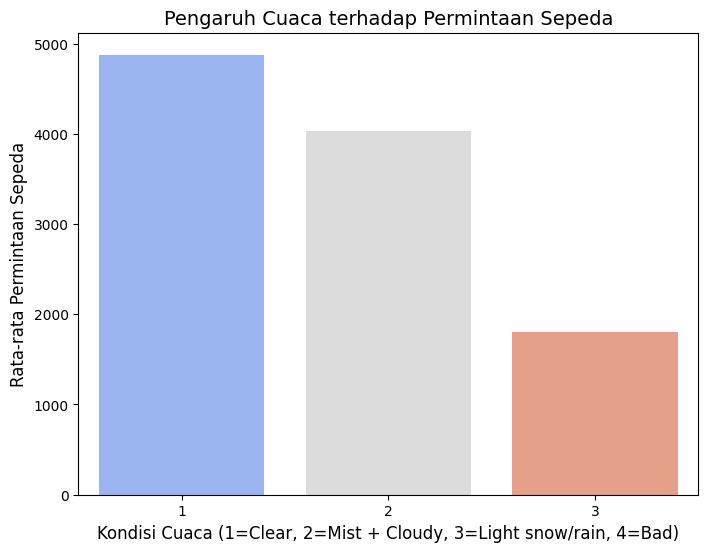

In [115]:
# Rata-rata permintaan based on kondisi cuaca
weather_effect = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_effect, palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Permintaan Sepeda', fontsize=14)
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist + Cloudy, 3=Light snow/rain, 4=Bad)', fontsize=12)
plt.ylabel('Rata-rata Permintaan Sepeda', fontsize=12)
plt.show()

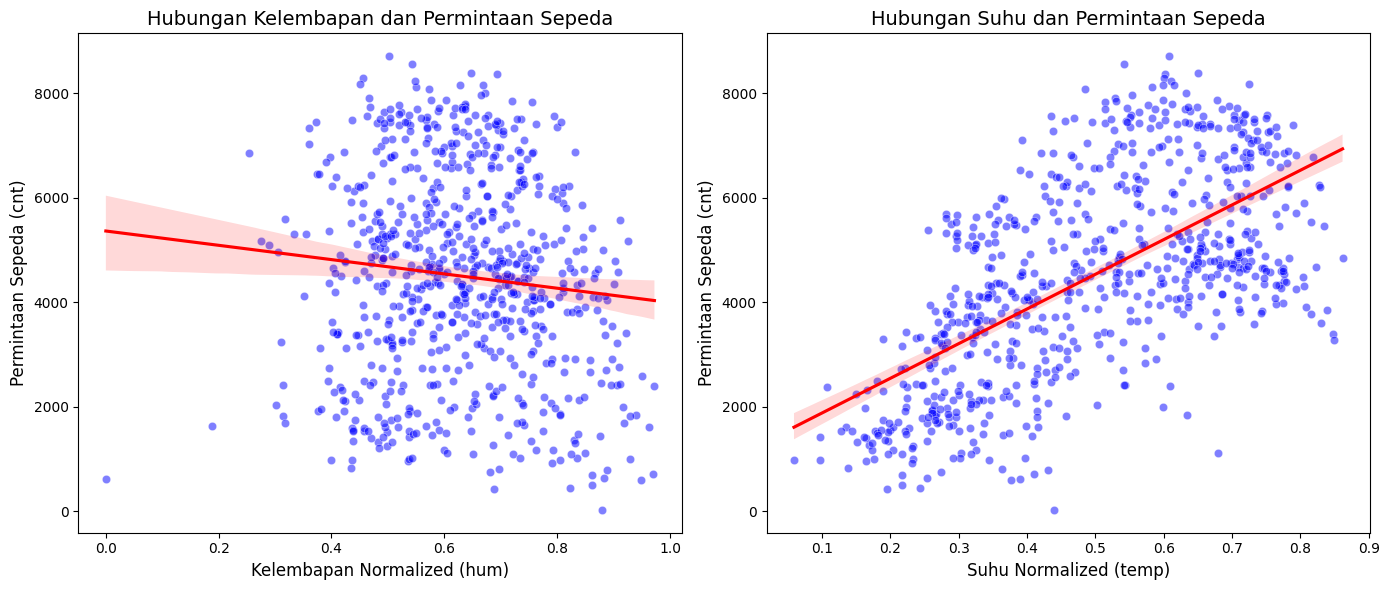

In [116]:
plt.figure(figsize=(14, 6))

# Grafik Hubungan Kelembapan dan Permintaan
plt.subplot(1, 2, 1)
sns.scatterplot(x='hum', y='cnt', data=day_df, color='blue', alpha=0.5)
sns.regplot(x='hum', y='cnt', data=day_df, scatter=False, color='red')
plt.title('Hubungan Kelembapan dan Permintaan Sepeda', fontsize=14)
plt.xlabel('Kelembapan Normalized (hum)', fontsize=12)
plt.ylabel('Permintaan Sepeda (cnt)', fontsize=12)

# Grafik Hubungan Suhu dan Permintaan
plt.subplot(1, 2, 2)
sns.scatterplot(x='temp', y='cnt', data=day_df, color='blue', alpha=0.5)
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, color='red')
plt.title('Hubungan Suhu dan Permintaan Sepeda', fontsize=14)
plt.xlabel('Suhu Normalized (temp)', fontsize=12)
plt.ylabel('Permintaan Sepeda (cnt)', fontsize=12)

plt.tight_layout()
plt.show()

**Insight dan Penjelasan:**

**1. Pengaruh Cuaca terhadap Penggunaan Sepeda**
*   Cuaca sangat mempengaruhi pola penggunaan sepeda. Permintaan sepeda paling tinggi saat cuaca cerah, sementara permintaan hampir tidak ada saat cuaca sangat buruk (seperti hujan deras atau salju). Hal ini menunjukkan bahwa pengguna cenderung menghindari bersepeda pada kondisi cuaca ekstrem, dan lebih memilih bersepeda saat cuaca mendukung aktivitas luar ruangan.



**2. Pengaruh Suhu dan Kelembapan terhadap Permintaan Sepeda**
*   Permintaan sepeda cenderung menurun ketika tingkat kelembapan meningkat. Hal ini mungkin karena kelembapan yang tinggi menyebabkan ketidaknyamanan bagi pengguna sepeda, yang berpotensi membuat mereka lebih memilih untuk tidak bersepeda pada kondisi tersebut.


**3. Kondisi Cuaca Mempengaruhi Aktivitas**

*  Suhu adalah faktor penting yang mempengaruhi permintaan sepeda. Ketika suhu lebih tinggi (lebih hangat), orang cenderung lebih sering bersepeda. Ini menunjukkan bahwa cuaca yang nyaman, terutama pada suhu yang hangat, mendorong orang untuk lebih aktif bersepeda, baik untuk aktivitas harian maupun rekreasi.


*  Suhu pada Spring dan Fall tidak berbeda jauh, namun kelembapan di musim Fall lebih tinggi, yang mendukung kenyamanan bersepeda. Meskipun demikian, Fall cenderung mendorong lebih banyak aktivitas bersepeda daripada Spring, karena kombinasi suhu yang sedikit lebih hangat dan kelembapan yang lebih tinggi.





## Analisis Lanjutan (Opsional)

In [117]:
# Mengubah tipe dteday ke timestamp
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


<ipython-input-118-1e3207bb91c4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_day, x='Segment', palette='coolwarm', order=['Loyal Customer', 'Potential Loyalist', 'New Customers'])


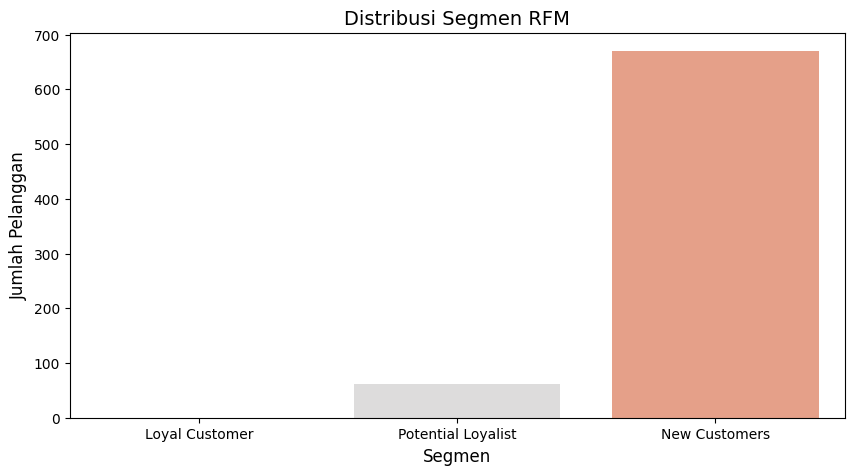

In [118]:
max_date = day_df['dteday'].max

# Menghitung RFM Metrics
max_date = day_df['dteday'].max()
rfm_day = day_df.groupby('dteday').agg({
    'cnt' : ['sum', 'count']  # Sum untuk Monetary, count untuk Freq
}).reset_index()
rfm_day.columns = ['Date', 'Monetary', 'Frequency']
rfm_day['Recency'] = (max_date - rfm_day['Date']).dt.days

# Segmentasi RFM
def rfm_segment(recency, frequency, monetary):
    if recency <= 30 and frequency >= 3:
        return 'Loyal Customer'
    elif recency <= 60:
        return 'Potential Loyalist'
    else:
        return 'New Customers'

rfm_day['Segment'] = rfm_day.apply(lambda x: rfm_segment(x['Recency'], x['Frequency'], x['Monetary']), axis=1)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm_day, x='Segment', palette='coolwarm', order=['Loyal Customer', 'Potential Loyalist', 'New Customers'])
plt.title("Distribusi Segmen RFM", fontsize=14)
plt.xlabel("Segmen", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.show()


<ipython-input-119-f7de4f5b543f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_hour, x='Segment', palette='coolwarm', order=['Loyal Customer', 'Potential Loyalist', 'New Customers'])


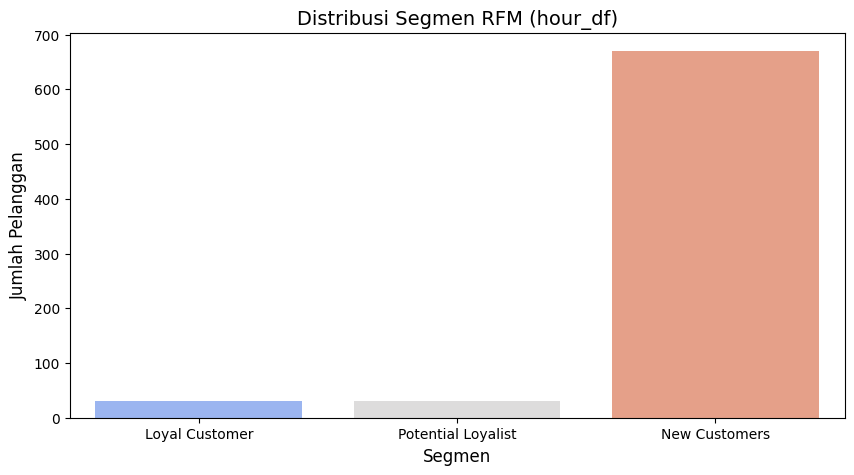

In [119]:
# RFM Analysis untuk hour_df
max_date_hour = hour_df['dteday'].max()
rfm_hour = hour_df.groupby(['dteday']).agg({
    'cnt': ['sum', 'count']
}).reset_index()
rfm_hour.columns = ['Date', 'Monetary', 'Frequency']
rfm_hour['Recency'] = (max_date_hour - rfm_hour['Date']).dt.days

# Segmentasi
rfm_hour['Segment'] = rfm_hour.apply(lambda x: rfm_segment(x['Recency'], x['Frequency'], x['Monetary']), axis=1)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm_hour, x='Segment', palette='coolwarm', order=['Loyal Customer', 'Potential Loyalist', 'New Customers'])
plt.title("Distribusi Segmen RFM (hour_df)", fontsize=14)
plt.xlabel("Segmen", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.show()


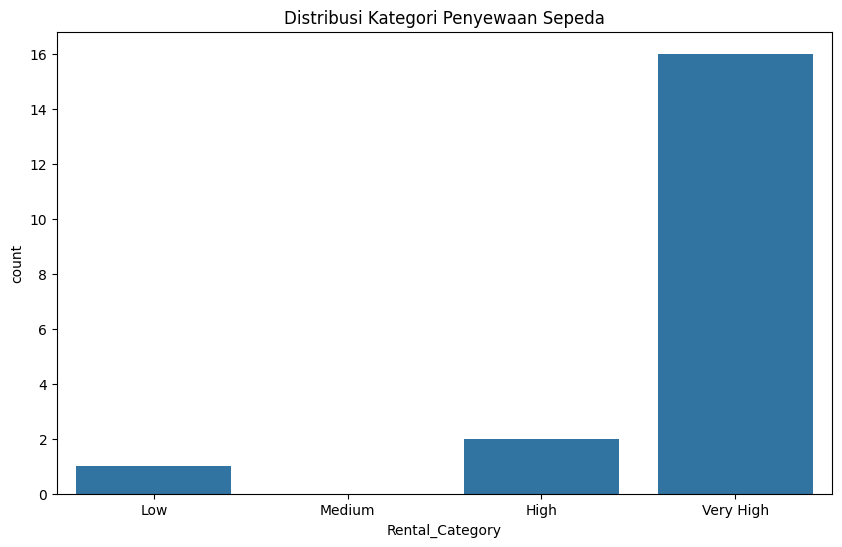

In [120]:
# Binning berdasarkan 'cnt' untuk kategorikan penyewaan
bins = [0, 50, 200, 500, 1000]
labels = ['Low', 'Medium', 'High', 'Very High']
day_df['Rental_Category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Visualisasi distribusi kategori
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=day_df, x='Rental_Category')
plt.title('Distribusi Kategori Penyewaan Sepeda')
plt.show()


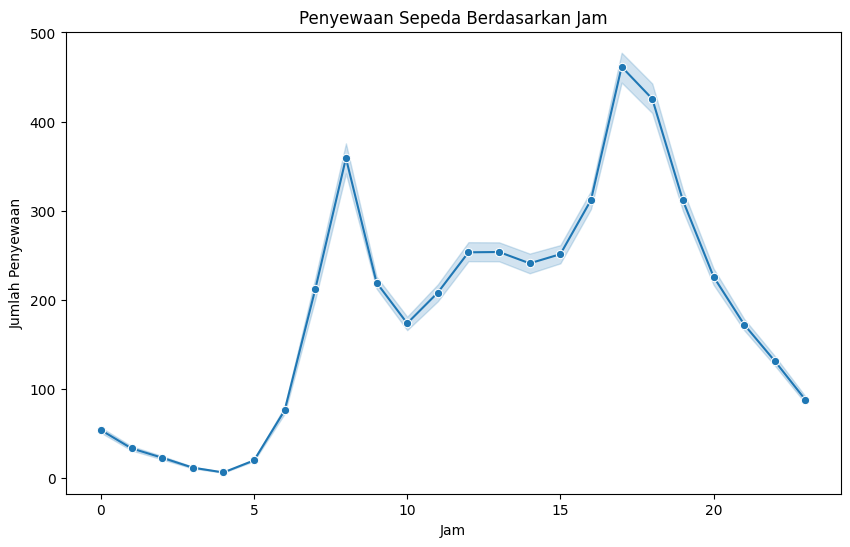

In [121]:
# Penyewaan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df, marker='o')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

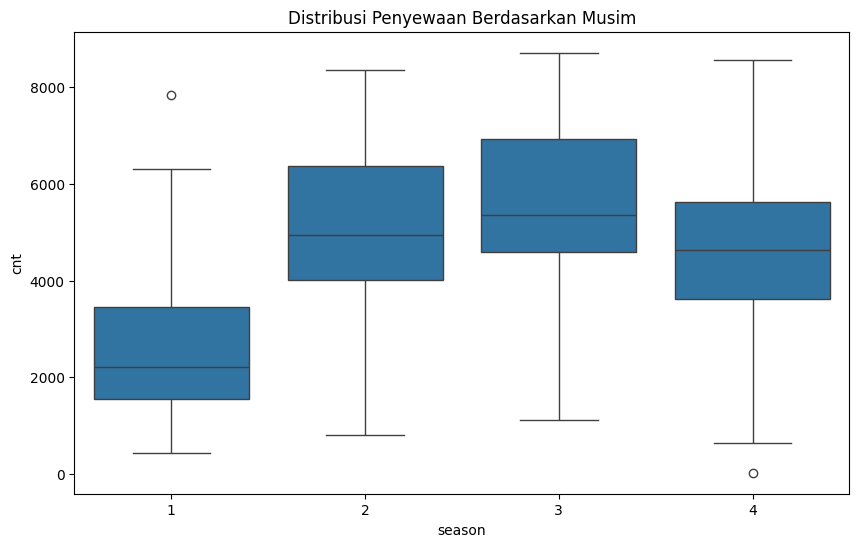

In [122]:
# Penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Penyewaan Berdasarkan Musim')
plt.show()


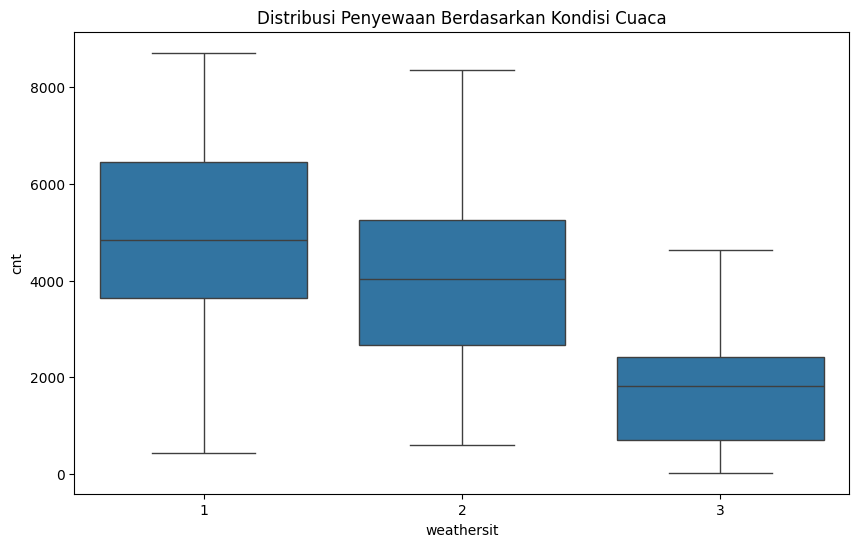

In [123]:
# Penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca')
plt.show()


## Conclusion

**1.  Conclusion pertanyaan 1**

*  Berdasarkan analisis data, dapat disimpulkan bahwa permintaan sepeda sangat dipengaruhi oleh faktor musim, suhu, dan kelembapan. Musim Fall menunjukkan permintaan yang lebih tinggi, terutama pada jam-jam sibuk seperti pagi dan sore, yang dipengaruhi oleh cuaca yang lebih mendukung dan kelembapan yang lebih tinggi, sehingga lebih nyaman untuk bersepeda. Sebaliknya, musim Spring meskipun memiliki suhu yang serupa dengan Fall, cenderung menunjukkan permintaan yang lebih rendah pada jam-jam non-sibuk, terutama karena kelembapan yang lebih rendah, yang bisa membuat cuaca terasa kurang nyaman untuk aktivitas luar ruangan. Meskipun ada sedikit perbedaan dalam pola penggunaan sepeda antara akhir pekan dan hari kerja, hari kerja tetap menunjukkan angka yang lebih tinggi, mengindikasikan bahwa sepeda lebih sering digunakan untuk keperluan sehari-hari seperti perjalanan menuju tempat kerja atau sekolah. Secara keseluruhan, kondisi cuaca yang mendukung memainkan peran penting dalam meningkatkan aktivitas bersepeda.










**2.  Conclusion pertanyaan 2**
* Berdasarkan analisis data, dapat disimpulkan bahwa pola penggunaan sepeda sangat dipengaruhi oleh jenis pengguna, waktu, dan musim. Pengguna Registered cenderung lebih loyal dan rutin menggunakan sepeda sebagai bagian dari aktivitas harian mereka, sementara pengguna Casual lebih jarang dan hanya menyewa sepeda sesekali untuk keperluan tertentu. Pengguna Casual lebih sering menggunakan sepeda pada weekday, kemungkinan besar untuk berangkat dan pulang kerja, sedangkan pengguna Registered lebih banyak menggunakan sepeda pada weekend, yang lebih berkaitan dengan kegiatan rekreasi. Baik Casual maupun Registered menunjukkan permintaan tertinggi pada musim Fall, yang dipengaruhi oleh cuaca yang lebih nyaman dan mendukung aktivitas bersepeda. Dengan demikian, pola penggunaan sepeda dapat dipengaruhi oleh rutinitas harian, waktu, dan kondisi cuaca musim tertentu.


**3.  Conclusion pertanyaan 3**
Berdasarkan analisis data, dapat disimpulkan bahwa faktor cuaca, suhu, dan kelembapan memainkan peran penting dalam menentukan pola penggunaan sepeda. Cuaca cerah mendorong permintaan sepeda yang lebih tinggi, sementara kondisi cuaca buruk seperti hujan atau salju mengurangi penggunaan sepeda secara signifikan. Suhu yang lebih hangat juga berkontribusi pada meningkatnya permintaan sepeda, karena orang cenderung lebih aktif bersepeda saat cuaca nyaman. Sebaliknya, kelembapan yang tinggi cenderung menurunkan permintaan sepeda, mungkin karena ketidaknyamanan yang ditimbulkan pada pengguna. Dengan demikian, cuaca yang mendukung, suhu yang nyaman, dan kelembapan yang rendah sangat berpengaruh terhadap keputusan pengguna untuk bersepeda.







